# CP1: Í∏∞ÎåÄ ÏàòÎ™Ö ÏòàÏ∏°ÌïòÍ∏∞

## 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
from scipy.stats import chi2_contingency
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [3]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv('/Users/minky/Library/Mobile Documents/com~apple~CloudDocs/AIB/·Ñë·Ö≥·ÑÖ·Ö©·Ñå·Ö¶·Ü®·Ñê·Ö≥/CP1/life_ex.csv')
df.head(3)

Country  Year      Status  Life expectancy  Adult Mortality  \
0  Afghanistan  2015  Developing             65.0            263.0   
1  Afghanistan  2014  Developing             59.9            271.0   
2  Afghanistan  2013  Developing             59.9            268.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles  ...  \
0             62     0.01               71.279624         65.0     1154  ...   
1             64     0.01               73.523582         62.0      492  ...   
2             66     0.01               73.219243         64.0      430  ...   

   Polio  Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0    6.0               8.16        65.0       0.1  584.259210  33736494.0   
1   58.0               8.18        62.0       0.1  612.696514    327582.0   
2   62.0               8.13        64.0       0.1  631.744976  31731688.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  

[3 rows x 22 columns]

In [4]:
# Îç∞Ïù¥ÌÑ∞ ÌèâÍ∑†/Ï§ëÏïô/ÏµúÏÜå/ÏµúÎåÄ Îì± Í∞í ÌôïÏù∏
df.describe().iloc[:, 1:]

Life expectancy  Adult Mortality  infant deaths      Alcohol  \
count      2928.000000      2928.000000    2938.000000  2744.000000   
mean         69.224932       164.796448      30.303948     4.602861   
std           9.523867       124.292079     117.926501     4.052413   
min          36.300000         1.000000       0.000000     0.010000   
25%          63.100000        74.000000       0.000000     0.877500   
50%          72.100000       144.000000       3.000000     3.755000   
75%          75.700000       228.000000      22.000000     7.702500   
max          89.000000       723.000000    1800.000000    17.870000   

       percentage expenditure  Hepatitis B        Measles          BMI  \
count             2938.000000  2385.000000    2938.000000  2904.000000   
mean               738.251295    80.940461    2419.592240    38.321247   
std               1987.914858    25.070016   11467.272489    20.044034   
min                  0.000000     1.000000       0.000000     1.000000   
25%                  4.685343    77.000000       0.000000    19.300000   
50%                 64.912906    92.000000      17.000000    43.500000   
75%                441.534144    97.000000     360.250000    56.200000   
max              19479.911610    99.000000  212183.000000    87.300000   

       under-five deaths        Polio  Total expenditure   Diphtheria  \
count        2938.000000  2919.000000         2712.00000  2919.000000   
mean           42.035739    82.550188            5.93819    82.324084   
std           160.445548    23.428046            2.49832    23.716912   
min             0.000000     3.000000            0.37000     2.000000   
25%             0.000000    78.000000            4.26000    78.000000   
50%             4.000000    93.000000            5.75500    93.000000   
75%            28.000000    97.000000            7.49250    97.000000   
max          2500.000000    99.000000           17.60000    99.000000   

          HIV/AIDS            GDP    Population   thinness  1-19 years  \
count  2938.000000    2490.000000  2.286000e+03            2904.000000   
mean      1.742103    7483.158469  1.275338e+07               4.839704   
std       5.077785   14270.169342  6.101210e+07               4.420195   
min       0.100000       1.681350  3.400000e+01               0.100000   
25%       0.100000     463.935626  1.957932e+05               1.600000   
50%       0.100000    1766.947595  1.386542e+06               3.300000   
75%       0.800000    5910.806335  7.420359e+06               7.200000   
max      50.600000  119172.741800  1.293859e+09              27.700000   

        thinness 5-9 years  Income composition of resources    Schooling  
count          2904.000000                      2771.000000  2775.000000  
mean              4.870317                         0.627551    11.992793  
std               4.508882                         0.210904     3.358920  
min               0.100000                         0.000000     0.000000  
25%               1.500000                         0.493000    10.100000  
50%               3.300000                         0.677000    12.300000  
75%               7.200000                         0.779000    14.300000  
max              28.600000                         0.948000    20.700000

In [5]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏& Ï§ëÎ≥µ ÌôïÏù∏
print('Í≤∞Ï∏°Ïπò: \n',df.isna().sum())
print('---------------------------------------------')
print('Ï§ëÎ≥µ: ', df.duplicated().sum())
print('---------------------------------------------')
print('Îç∞Ïù¥ÌÑ∞ÏÖã ÌÅ¨Í∏∞: ', df.shape)

Í≤∞Ï∏°Ïπò: 
 Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
---------------------------------------------
Ï§ëÎ≥µ:  0
---------------------------------------------
Îç∞Ïù¥ÌÑ∞ÏÖã 

## 2. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
### 2-1. Ïª¨ÎüºÎ™Ö Ïû¨ÏÑ§Ï†ï Î∞è Îã®ÏúÑ ÌÜµÏùº
- Î®ºÏ†Ä Ïª¨ÎüºÎ™ÖÏùÑ ÏÑ§Î™ÖÏóê ÎßûÍ≤å Îã§Ïãú Ïû¨ÏÑ§Ï†ïÌïúÎã§.
- Í∑∏Î¶¨Í≥† adult_mortality, infant_mortality, under-five_mortality, measlesÏôÄ Í∞ôÏùÄ Ïª¨ÎüºÏùÑ numsÍ∞Ä ÏïÑÎãå ÌôïÎ•†Î°ú ÌëúÍ∏∞ÌïòÎèÑÎ°ù ÌÜµÏùºÏãúÌÇ®Îã§.

In [5]:
def rename_cols(df):    # Ïª¨ÎüºÎ™Ö Ïû¨ÏÑ§Ï†ï: Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™ÖÎ≥¥Í≥† ÏÑ§Î™ÖÏóê ÎßûÍ≤å Îã§Ïãú Ïû¨ÏÑ§Ï†ïÌï®
    df.rename(columns = {' thinness  1-19 years':'thin 1019',' thinness 5-9 years':'thin 59', 'Income composition of resources':'HDI', 'infant deaths':'Infant Mortality', 'under-five deaths':'Under_five Mortality', 'HIV/AIDS':'hiv'},inplace=True)
    df = df.replace('United Kingdom of Great Britain and Northern Ireland', 'UK&Ireland')
    # Ïª¨ÎüºÎ™ÖÏùÑ ÏÜåÎ¨∏ÏûêÎ°ú ÌÜµÏùºÏãúÌÇ§Í≥† Í≥µÎ∞±ÏùÑ _Î°ú ÎåÄÏ≤¥
    new_cols = []
    for col in list(df.columns):
        new_cols.append(col.strip().replace(' ', '_').lower())
    df.columns = new_cols


    return df

def nums_to_rate(x):  # 1000Î™ÖÎãπ Ìï¥Îãπ numsÎ•º ÌôïÎ•†Î°ú ÌëúÍ∏∞ ÌÜµÏùºÌïòÍ∏∞
    x = x/1000
    return x

In [6]:
# rename_cols Ìï®Ïàò Ï†ÅÏö©Ìï¥ data cleaning
df = rename_cols(df)

## rename_colsÍ∞Ä Ïûò Ï†ÅÏö©ÎêòÏóàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞
print(df.columns)
print('-'*30)
print(df['country'].unique())

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_mortality', 'alcohol', 'percentage_expenditure', 'hepatitis_b',
       'measles', 'bmi', 'under_five_mortality', 'polio', 'total_expenditure',
       'diphtheria', 'hiv', 'gdp', 'population', 'thin_1019', 'thin_59', 'hdi',
       'schooling'],
      dtype='object')
------------------------------
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "C√¥te d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic 

In [7]:
# nums_to_rate Ìï®Ïàò Ï†ÅÏö©Ìï¥ nums -> ÌôïÎ•†Î°ú Î≥ÄÌôòÌïòÍ∏∞
lista = ['adult_mortality', 'infant_mortality', 'under_five_mortality', 'measles']
for i in lista:
    df[i] = nums_to_rate(df[i])

# nums_to_rate Ìï®Ïàò Ïûò Ï†ÅÏö©ÎêòÏóàÎäîÏßÄ ÌôïÏù∏
df[['adult_mortality', 'infant_mortality', 'under_five_mortality', 'measles']].head()

adult_mortality  infant_mortality  under_five_mortality  measles
0            0.263             0.062                 0.083    1.154
1            0.271             0.064                 0.086    0.492
2            0.268             0.066                 0.089    0.430
3            0.272             0.069                 0.093    2.787
4            0.275             0.071                 0.097    3.013

### 2-2. Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

    Î∞©Î≤ï 1) Í∞Å Íµ≠Í∞ÄÎ≥ÑÎ°ú Í≤∞Ï∏°ÏπòÎ•º Î≥¥Í∞ÑÌïòÏó¨ Ï≤òÎ¶¨ÌïòÍ∏∞

    Î∞©Î≤ï 2) ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê Í∞Å ÎÖÑÎèÑÎ≥ÑÎ°ú Í≤∞Ï∏°ÏπòÎ•º Î≥¥Í∞ÑÌïòÏó¨ Ï≤òÎ¶¨ÌïòÍ∏∞

    Î∞©Î≤ï 3) Ï†úÍ±∞ÌïòÏó¨ Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨

In [8]:
# Î∞©Î≤ï 1) Í∞Å Íµ≠Í∞ÄÎ≥ÑÎ°ú Î≥¥Í∞Ñ ÏßÑÌñâ
cols_list = list(df.columns)[3:]

df1 = df.copy()

for country in list(df['country'].unique()):
    df1.loc[df1['country'] == country, cols_list] = df1.loc[df1['country'] == country, cols_list].interpolate()
    
# Î≥¥Í∞Ñ Ïù¥ÌõÑ ÎÇ®ÏïÑÏûàÎäî Í≤∞Ï∏°ÏπòÎäî Ï†úÍ±∞ÌïòÏó¨ Ï≤òÎ¶¨
df1.dropna(inplace=True)

In [ ]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ summary
print(df1.shape)              # Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (1987, 22)
print('-------------------------------------------')
print(df1.describe())

(1987, 22)
-------------------------------------------
              year  life_expectancy  adult_mortality  infant_mortality  \
count  1987.000000      1987.000000      1987.000000       1987.000000   
mean   2006.984902        67.981782         0.175187          0.036624   
std       4.323147         9.706401         0.131617          0.138785   
min    2000.000000        36.300000         0.001000          0.000000   
25%    2003.000000        61.700000         0.075000          0.001000   
50%    2007.000000        69.900000         0.153000          0.004000   
75%    2011.000000        74.700000         0.243000          0.025000   
max    2015.000000        89.000000         0.723000          1.800000   

           alcohol  percentage_expenditure  hepatitis_b      measles  \
count  1987.000000             1987.000000   1987.00000  1987.000000   
mean      4.455644              685.492318     73.86160     2.729562   
std       3.976733             1761.669050     29.02807    12.

In [ ]:
# Í≤∞Ï∏°Ïπò Í∞úÏàò ÌôïÏù∏ÌïòÍ∏∞
print(df1.isna().sum())

country                   0
year                      0
status                    0
life_expectancy           0
adult_mortality           0
infant_mortality          0
alcohol                   0
percentage_expenditure    0
hepatitis_b               0
measles                   0
bmi                       0
under_five_mortality      0
polio                     0
total_expenditure         0
diphtheria                0
hiv                       0
gdp                       0
population                0
thin_1019                 0
thin_59                   0
hdi                       0
schooling                 0
dtype: int64


In [9]:
# Î∞©Î≤ï 2) Í∞Å ÎÖÑÎèÑÎ≥ÑÎ°ú Î≥¥Í∞Ñ ÏßÑÌñâÌïòÍ∏∞
df2 = df.copy()

fillna_data = []
for y in list(df2['year'].unique()):          # Í∞Å ÎÖÑÎèÑÎ≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Î¨∂Í∏∞wins_df['year'].unique()
    y_data = df2[df2['year'] == y].copy()
    for col_n in list(y_data.columns)[3:]:    # Í∞Å ÎÖÑÎèÑÎ≥ÑÎ°ú Í≤∞Ï∏°ÏπòÎ•º Ï†úÏô∏ÌïòÍ≥† Íµ¨Ìïú ÌèâÍ∑†Í∞íÏúºÎ°ú Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï®
        y_data[col_n] = y_data[col_n].fillna(y_data[col_n].dropna().mean()).copy()
    fillna_data.append(y_data)

df2 = pd.concat(fillna_data).copy()           # fillna_dataÎäî Î¶¨Ïä§Ìä∏Ïù¥Í≥†, Ïù¥ ÏïàÏóê ÏûàÎäî Îç∞Ïù¥ÌÑ∞Îì§ÏùÑ concatÌï¥ÏÑú Îã§Ïãú df ÌòïÌÉúÎ°ú Î≥ÄÌôòÌï®

In [10]:
# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ summary
print(df2.shape)              # Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (2938, 22)
print('-------------------------------------------')
print(df2.describe()) 

(2938, 22)
-------------------------------------------
              year  life_expectancy  adult_mortality  infant_mortality  \
count  2938.000000      2938.000000      2938.000000       2938.000000   
mean   2007.518720        69.231777         0.164742          0.030304   
std       4.613841         9.508362         0.124084          0.117927   
min    2000.000000        36.300000         0.001000          0.000000   
25%    2004.000000        63.200000         0.074000          0.000000   
50%    2008.000000        72.000000         0.144000          0.003000   
75%    2012.000000        75.600000         0.227000          0.022000   
max    2015.000000        89.000000         0.723000          1.800000   

           alcohol  percentage_expenditure  hepatitis_b      measles  \
count  2938.000000             2938.000000  2938.000000  2938.000000   
mean      4.644013              738.251295    80.322757     2.419592   
std       3.919849             1987.914858    22.682329    11.

In [11]:
# Í≤∞Ï∏°Ïπò Í∞úÏàò ÌôïÏù∏ÌïòÍ∏∞
print(df2.isna().sum())

country                   0
year                      0
status                    0
life_expectancy           0
adult_mortality           0
infant_mortality          0
alcohol                   0
percentage_expenditure    0
hepatitis_b               0
measles                   0
bmi                       0
under_five_mortality      0
polio                     0
total_expenditure         0
diphtheria                0
hiv                       0
gdp                       0
population                0
thin_1019                 0
thin_59                   0
hdi                       0
schooling                 0
dtype: int64


In [ ]:
# Î∞©Î≤ï 3) dropnaÎ°ú Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨
df3 = df.copy()
df3.dropna(inplace=True)

# df3Ïùò ÌÅ¨Í∏∞ÏôÄ Í≤∞Ï∏°ÏπòÍ∞Ä ÎÇ®ÏïÑÏûàÎäîÏßÄ ÌôïÏù∏
print('df3Ïùò ÌÅ¨Í∏∞: ', df3.shape)
print(df3.isna().sum())

df3Ïùò ÌÅ¨Í∏∞:  (1649, 22)
country                   0
year                      0
status                    0
life_expectancy           0
adult_mortality           0
infant_mortality          0
alcohol                   0
percentage_expenditure    0
hepatitis_b               0
measles                   0
bmi                       0
under_five_mortality      0
polio                     0
total_expenditure         0
diphtheria                0
hiv                       0
gdp                       0
population                0
thin_1019                 0
thin_59                   0
hdi                       0
schooling                 0
dtype: int64


-> ÏÑ∏ Í∞ÄÏßÄ Ï§ë Ï≤´ Î≤àÏß∏ÏôÄ ÏÑ∏ Î≤àÏß∏ Î∞©Î≤ïÏúºÎ°ú Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨ÌñàÏùÑ Îïå Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ Î∞úÏÉùÌïúÎã§.

Îî∞ÎùºÏÑú Îëê Î≤àÏß∏ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©Ìï¥ Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨ÌïòÍ≥† Ïù¥ÌõÑ Îã§Î•∏ Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï† Í≤ÉÏù¥Îã§.

In [12]:
# Îëê Î≤àÏß∏ Î∞©Î≤ïÏúºÎ°ú Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨ÌïòÍ∏∞Î°ú ÌñàÏúºÎãà df2Î•º dfÎ°ú Îã§Ïãú Ïû¨ÏßÄÏ†ïÌïòÍ∏∞
df = df2

### 2-3. Ïù¥ÏÉÅÏπò ÌÉêÏßÄ Î∞è Ï≤òÎ¶¨
#### ‚úÖ Ïù¥ÏÉÅÏπò ÌÉêÏßÄ
a. boxplotÏúºÎ°ú Ïù¥ÏÉÅÏπò ÌÉêÏßÄ

b. histogramÏúºÎ°ú Î∂ÑÌè¨ÎèÑ ÌôïÏù∏

In [13]:
# boxplotÏúºÎ°ú Í∞Å Î≥ÄÏàòÏùò Ïù¥ÏÉÅÏπò ÌÉêÏßÄÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò ÏÉùÏÑ±
def make_boxplot(i, list):
    plt.figure(figsize=(30, 30))
    x=0

    for c in list:
        x += 1
        plt.subplot(6, 4, x)
        sns.boxplot(i[c])
    
    plt.show();

# histogram ÎèÑÏ∂úÌïòÍ∏∞ ÏúÑÌïú Ìï®Ïàò ÏÉùÏÑ±
def make_histogram(i, list):
    plt.figure(figsize=(30, 30))
    x=0

    for c in list:
        x += 1
        plt.subplot(6, 4, x)
        sns.histplot(i[c])
    
    plt.show();

/Users/minky/opt/anaconda3/envs/cp2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/minky/opt/anaconda3/envs/cp2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/minky/opt/anaconda3/envs/cp2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

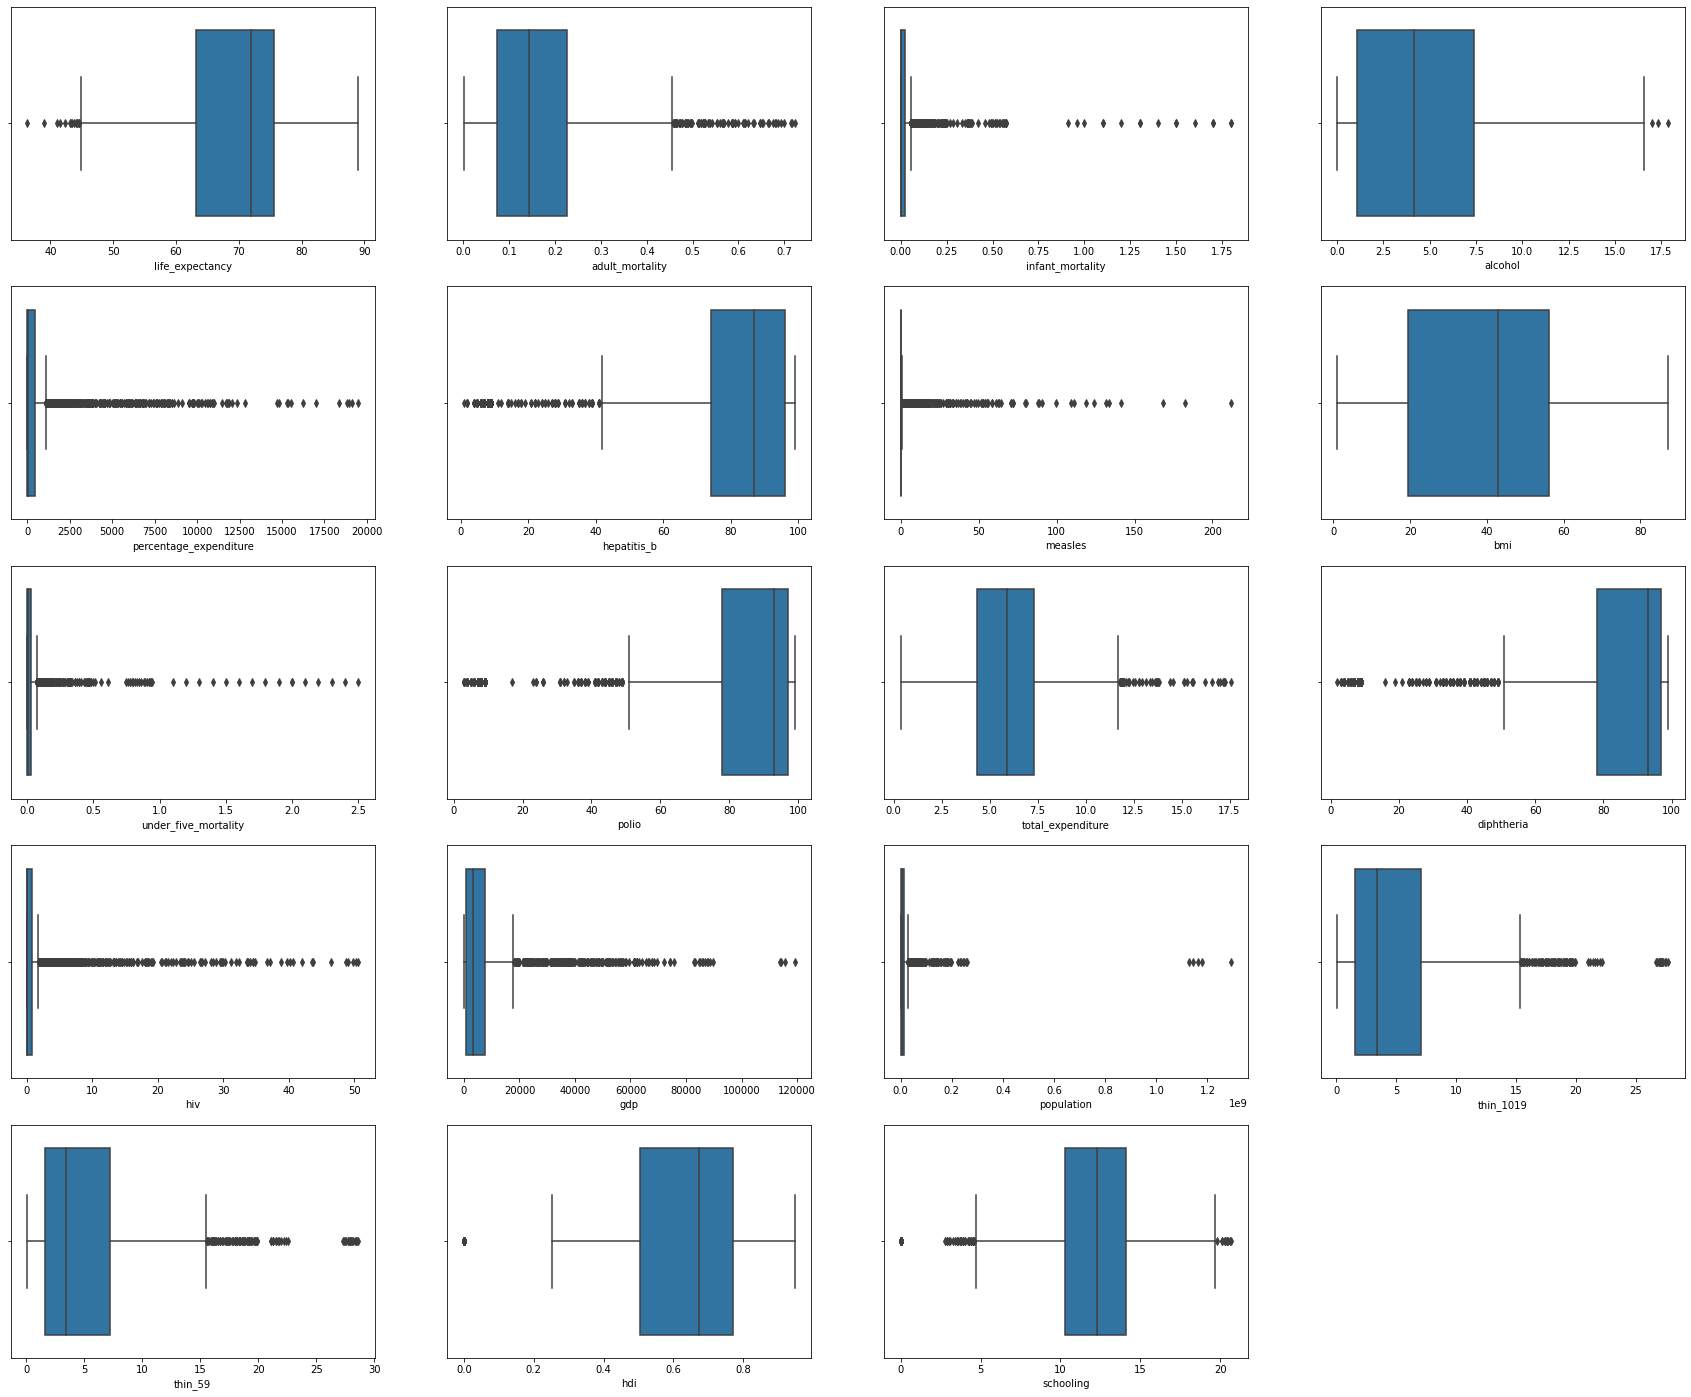

In [13]:
# boxplot ÎèÑÏ∂ú
%matplotlib inline

cols_list = list(df.columns)[3:]
make_boxplot(df, cols_list)

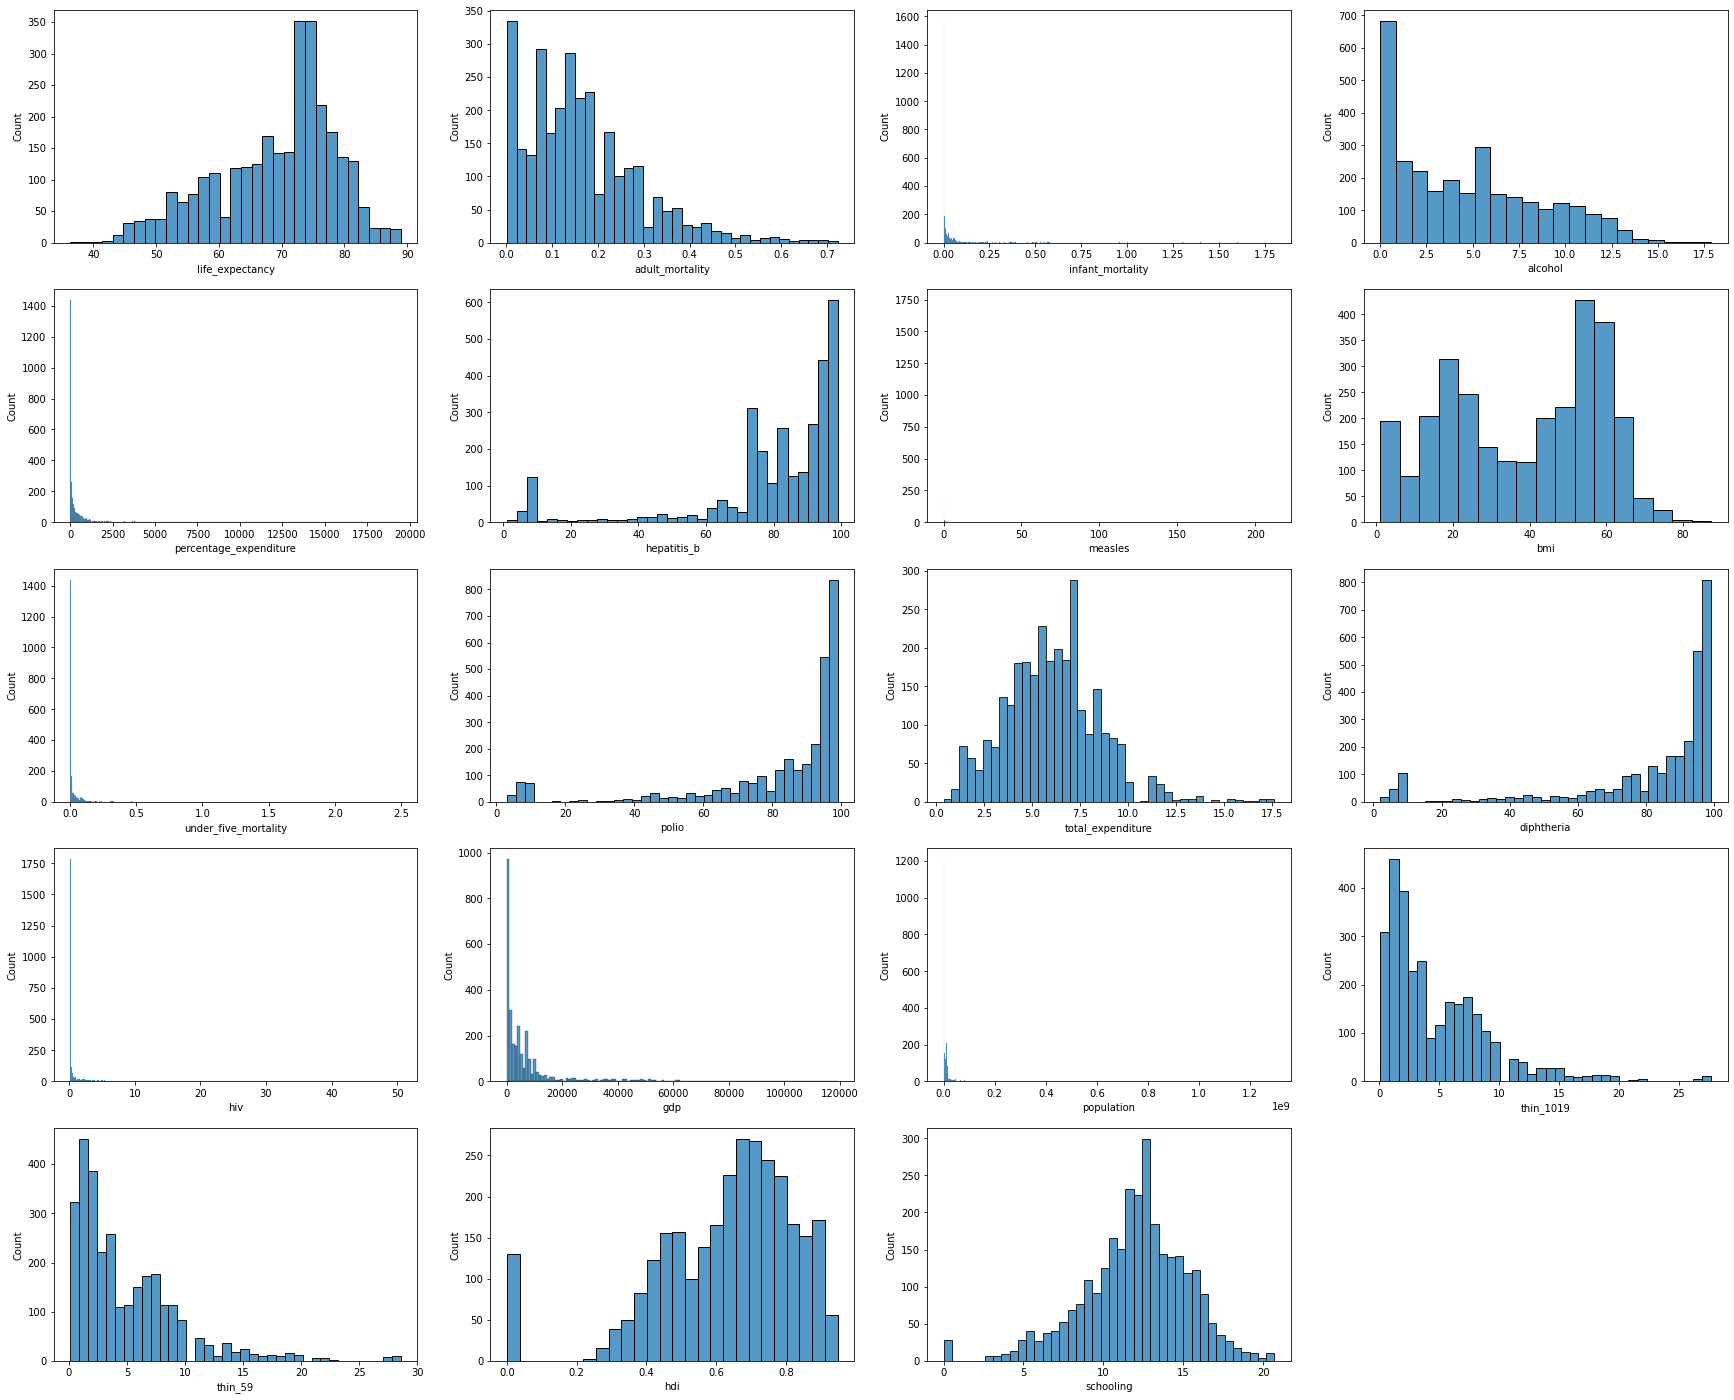

In [14]:
# ÌûàÏä§ÌÜ†Í∑∏Îû®
make_histogram(df, cols_list)

#### ‚úÖ Ïù¥ÏÉÅÏπò Ï†úÍ±∞
- Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨Î•º ÏúÑÌï¥ `winsorization` Ïã§Ïãú

    Î∞©Î≤ï 1) Ïù¥ÏÉÅÏπòÎ•º Í∑∏ÎÉ• Ï†úÍ±∞ÌïòÎäî Î∞©Î≤ï: Í∞ÄÏû• Í∞ÑÎã®ÌïòÍ≥† best <-> Í∑∏Îü¨ÎÇò Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ Î∞úÏÉùÌïòÍ≥†, Îç∞Ïù¥ÌÑ∞Ïùò ÏÑ§Î™ÖÎ†•ÎèÑ Îñ®Ïñ¥Ïßà Ïàò ÏûàÎã§.

    Î∞©Î≤ï 2) winsorization: Í∑πÎã® Í∞íÏùÑ ÌäπÏ†ï Í∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî Î∞©Î≤ïÏúºÎ°ú, ÏòàÎ•º Îì§Ïñ¥ ÏÉÅÏúÑ 99%ÏùÑ ÎÑòÎäî Îç∞Ïù¥ÌÑ∞Îäî 99%Ïùò Í∞íÏúºÎ°ú ÎåÄÏ≤¥ÌïúÎã§.

In [14]:
# Í∞Å featureÎßàÎã§ Ïù¥ÏÉÅÏπòÏùò ÎπÑÏ§ëÏù¥ ÏñºÎßàÎÇò ÎêòÎäîÏßÄ ÌååÏïÖÌïòÎäî Ìï®Ïàò ÏÉùÏÑ±
def outlier(col, df):
    q75, q25 = np.percentile(df[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)

    # ÏïÑÎûò len() = array([ 798, 1630, 1632, 1633]),)Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê [0]Ïùò lengthÎ•º Íµ¨Ìï¥ÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä Î™á Í∞úÏù∏ÏßÄ ÌååÏïÖ
    cnt = len(np.where((df[col] > max_val) | (df[col] < min_val))[0]) 
    percent = round(cnt/len(df[col])*100, 2)

    print('"' + col + '"' + ' Percent of outlier: {}%'.format(percent))

In [15]:
# Ïù¥ÏÉÅÏπò ÎπÑÏ§ë ÌååÏïÖÌïòÍ∏∞
for c in cols_list:
    outlier(c, df)

"life_expectancy" Percent of outlier: 0.58%
"adult_mortality" Percent of outlier: 2.93%
"infant_mortality" Percent of outlier: 10.72%
"alcohol" Percent of outlier: 0.1%
"percentage_expenditure" Percent of outlier: 13.24%
"hepatitis_b" Percent of outlier: 7.56%
"measles" Percent of outlier: 18.45%
"bmi" Percent of outlier: 0.0%
"under_five_mortality" Percent of outlier: 13.41%
"polio" Percent of outlier: 9.5%
"total_expenditure" Percent of outlier: 1.74%
"diphtheria" Percent of outlier: 10.14%
"hiv" Percent of outlier: 18.45%
"gdp" Percent of outlier: 10.21%
"population" Percent of outlier: 6.91%
"thin_1019" Percent of outlier: 3.4%
"thin_59" Percent of outlier: 3.37%
"hdi" Percent of outlier: 4.42%
"schooling" Percent of outlier: 2.62%


In [16]:
# winsorizeÌïòÏßÄ ÏïäÎäî Îç∞Ïù¥ÌÑ∞Îäî dfÏóêÏÑú Í∑∏ÎåÄÎ°ú Í∞ÄÏ†∏ÏôÄ not_winsÏóê Îî∞Î°ú Ï†ÄÏû•Ìï¥ÎëêÍ∏∞
not_wins = pd.DataFrame()
not_wins = pd.concat([df.iloc[:, 0:3], df.iloc[:, 10]], axis=1)
not_wins.head(3)

country  year      status   bmi
0   Afghanistan  2015  Developing  19.1
16      Albania  2015  Developing  58.0
32      Algeria  2015  Developing  59.5

In [17]:
# wisorization Ìï®Ïàò ÏÉùÏÑ±
def wins(col, data, limit):
    winsor_data = winsorize(data[col], limits=limit)
    wins_dict[col] =  winsor_data


cols_list.remove('bmi')     # cols_listÏóêÏÑú BMI Ï†úÍ±∞ÌïòÍ∏∞
wins_list = cols_list      # Ìó∑Í∞àÎ¶¨ÎãàÍπå Ïù¥Î¶Ñ Îã§Î•¥Í≤å Ìï¥Ï£ºÍ∏∞
wins_dict = {} 

In [18]:
# df2: winsorizationÏúºÎ°ú Ïù¥ÏÉÅÏπò Ï†úÍ±∞ÌïòÍ∏∞
wins('life_expectancy', df, limit=(0.01, 0.01))
wins('adult_mortality', df, limit=(0.03, 0.03))
wins('infant_mortality', df, limit=(0.11, 0.11))
wins('alcohol', df, limit=(0.015, 0.015))
wins('percentage_expenditure', df, limit=(0.14, 0.14))
wins('hepatitis_b', df, limit=(0.08, 0.08))
wins('measles', df, limit=(0.2, 0.2))
wins('under_five_mortality', df, limit=(0.14, 0.14))
wins('polio', df, limit=(0.1, 0.1))
wins('total_expenditure', df, limit=(0.02, 0.02))
wins('diphtheria', df, limit=(0.11, 0.11))
wins('hiv', df, limit=(0.19, 0.19))
wins('gdp', df, limit=(0.11, 0.11))
wins('population', df, limit=(0.07, 0.07))
wins('thin_1019', df, limit=(0.04, 0.04))
wins('thin_59', df, limit=(0.04, 0.04))
wins('hdi', df, limit=(0.05, 0.05))
wins('schooling', df, limit=(0.03, 0.03))

# winsorizeÌïú Îç∞Ïù¥ÌÑ∞Î•º wins_dfÏóê Ï†ÄÏû•
wins_df = not_wins
for col in wins_list:
    wins_df[col] = wins_dict[col]

/Users/minky/opt/anaconda3/envs/cp2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/minky/opt/anaconda3/envs/cp2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/minky/opt/anaconda3/envs/cp2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

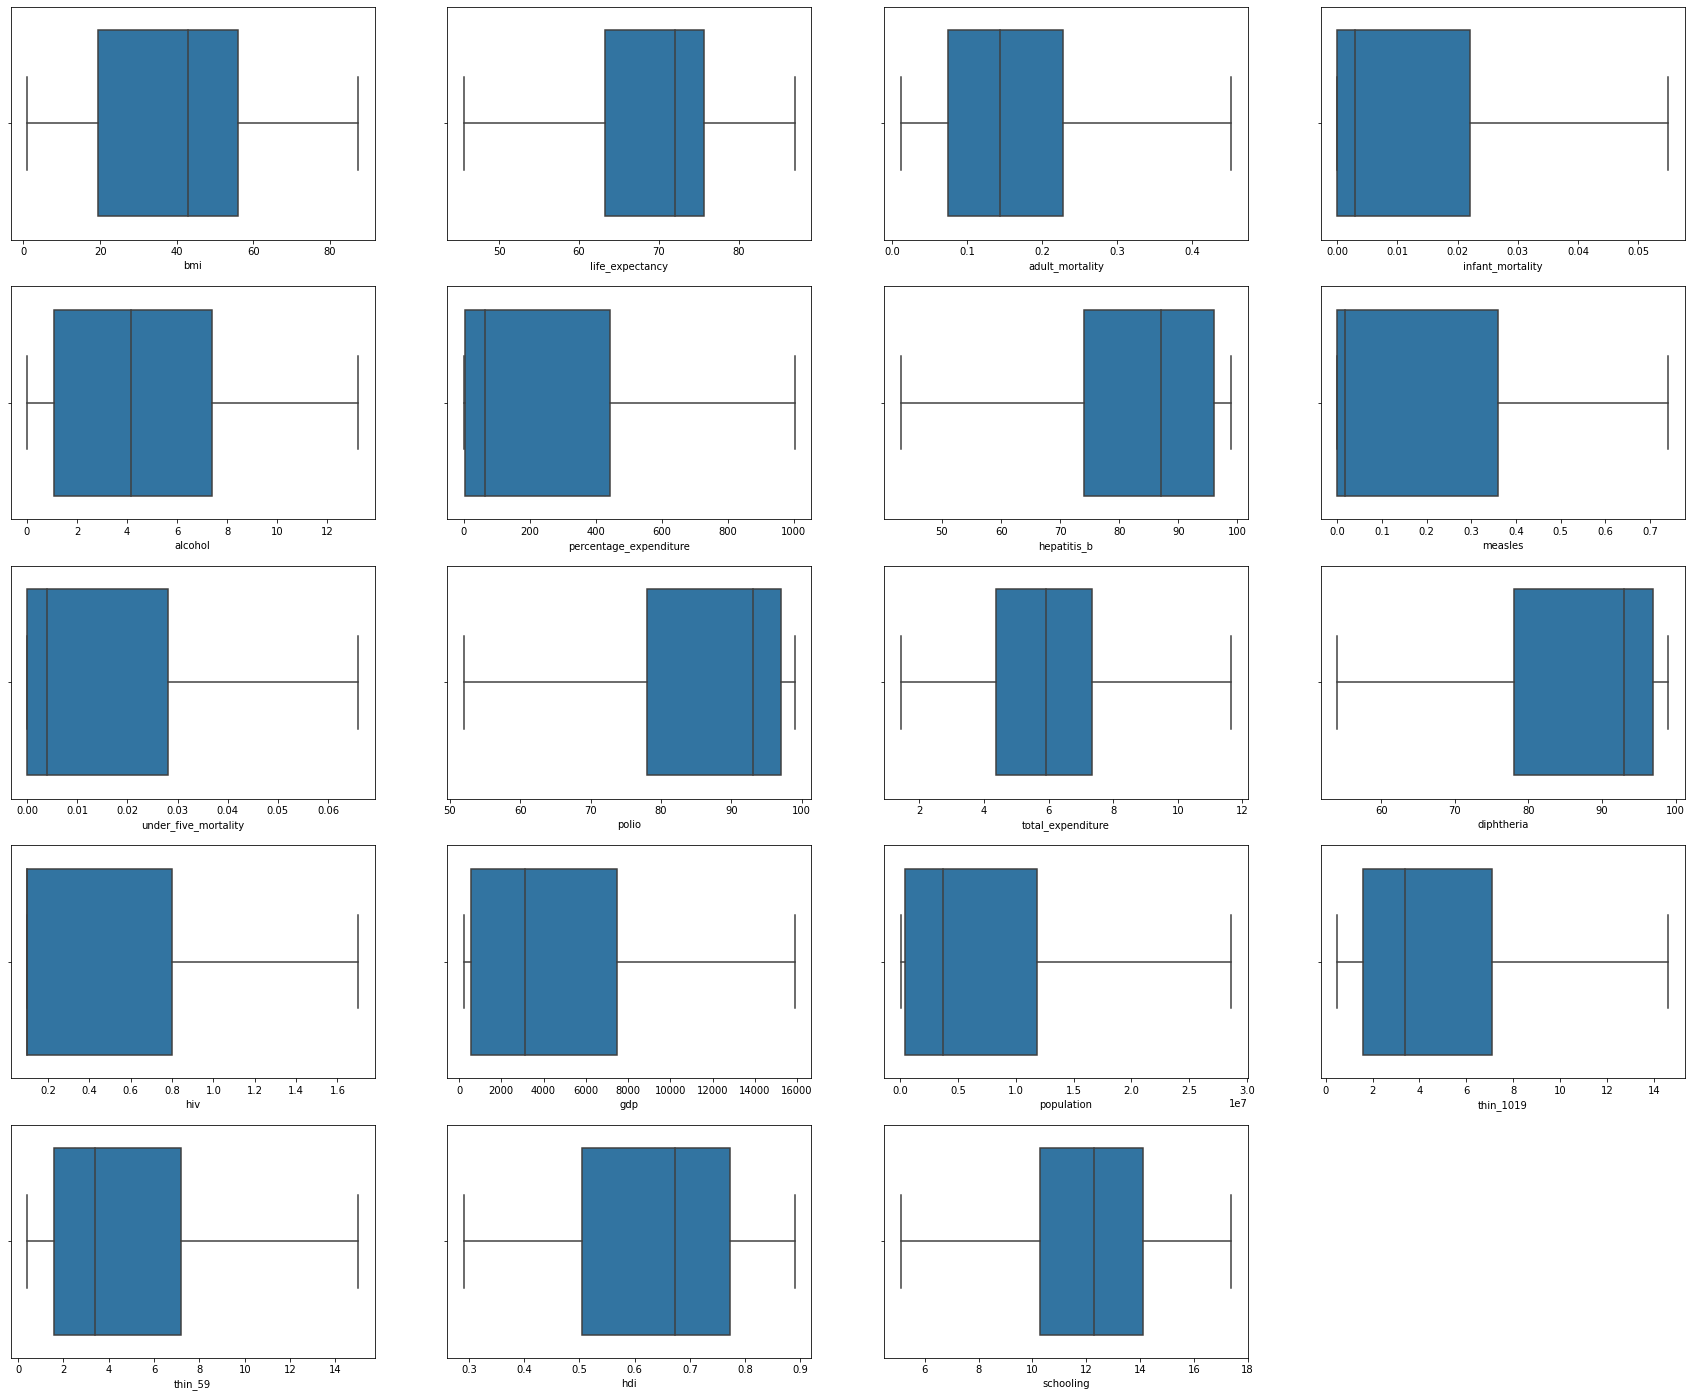

In [20]:
# winsorization ÌõÑ boxplot ÌôïÏù∏
make_boxplot(wins_df, list(wins_df.columns[3:]))

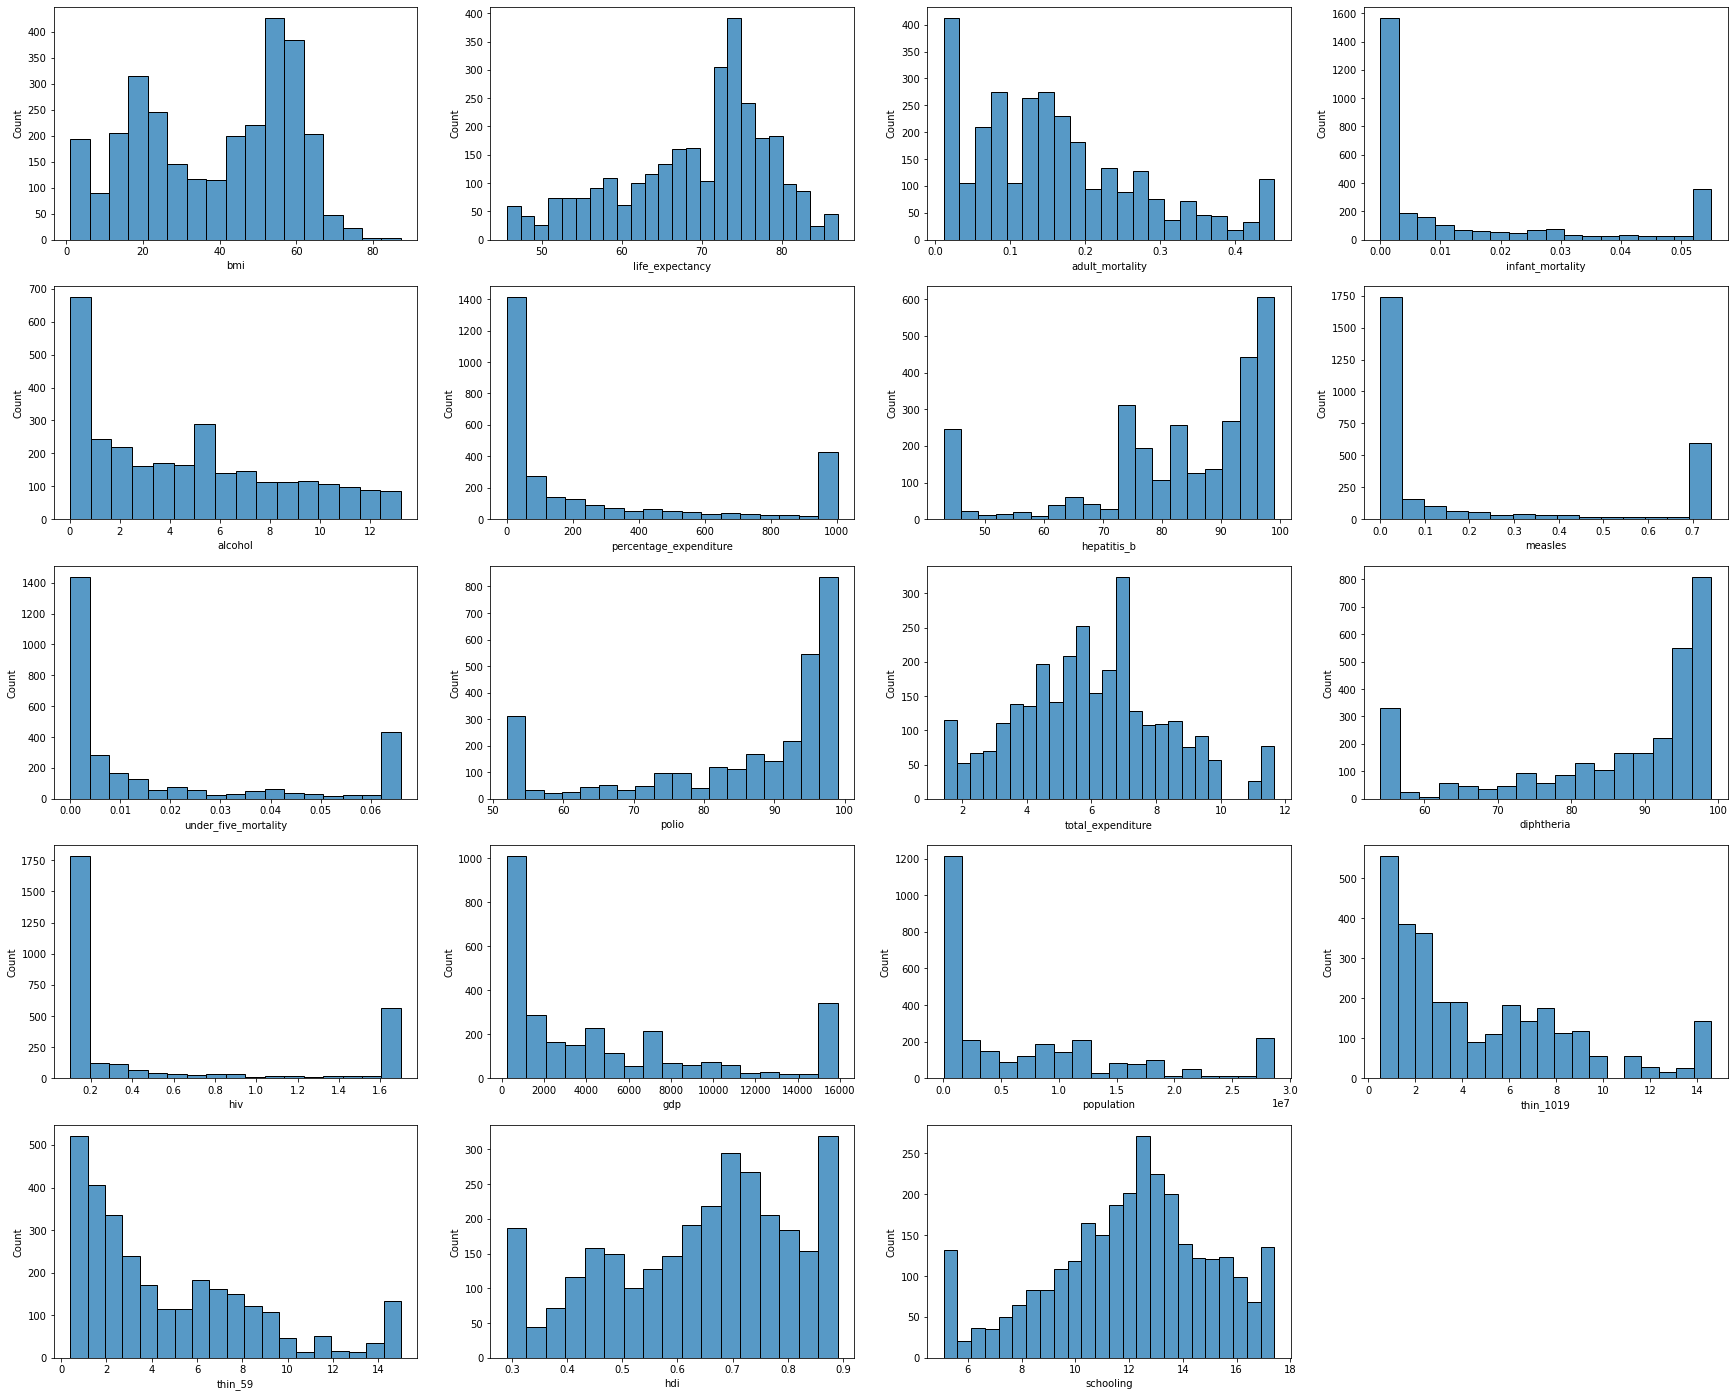

In [ ]:
# ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°úÎèÑ ÏÇ¥Ìé¥Î≥¥Í∏∞
make_histogram(wins_df, list(wins_df.columns[3:]))

## 3. EDA
`winsorization`ÍπåÏßÄ Í±∞Ïπú Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Í∞ÄÏßÄÍ≥† Í∞Å featureÏùò valueÍ∞Ä Ïñ¥ÎñªÍ≤å Ïù¥Î£®Ïñ¥Ï†∏ÏûàÎäîÏßÄ Îì±Í≥º Í∞ôÏùÄ ÌäπÏßïÏùÑ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÌååÏïÖÌïúÎã§.

### 3-1. Categorical Î≥ÄÏàò 
    
    - country
    - year
    - status

Ïóê ÎåÄÌïú EDA Í≥ºÏ†ï ÏßÑÌñâ

In [ ]:
# country Í∞úÏàò
wins_df['country'].value_counts()

Afghanistan         16
Philippines         16
Niger               16
Nigeria             16
Norway              16
                    ..
Nauru                1
Monaco               1
Marshall Islands     1
Dominica             1
Tuvalu               1
Name: country, Length: 193, dtype: int64

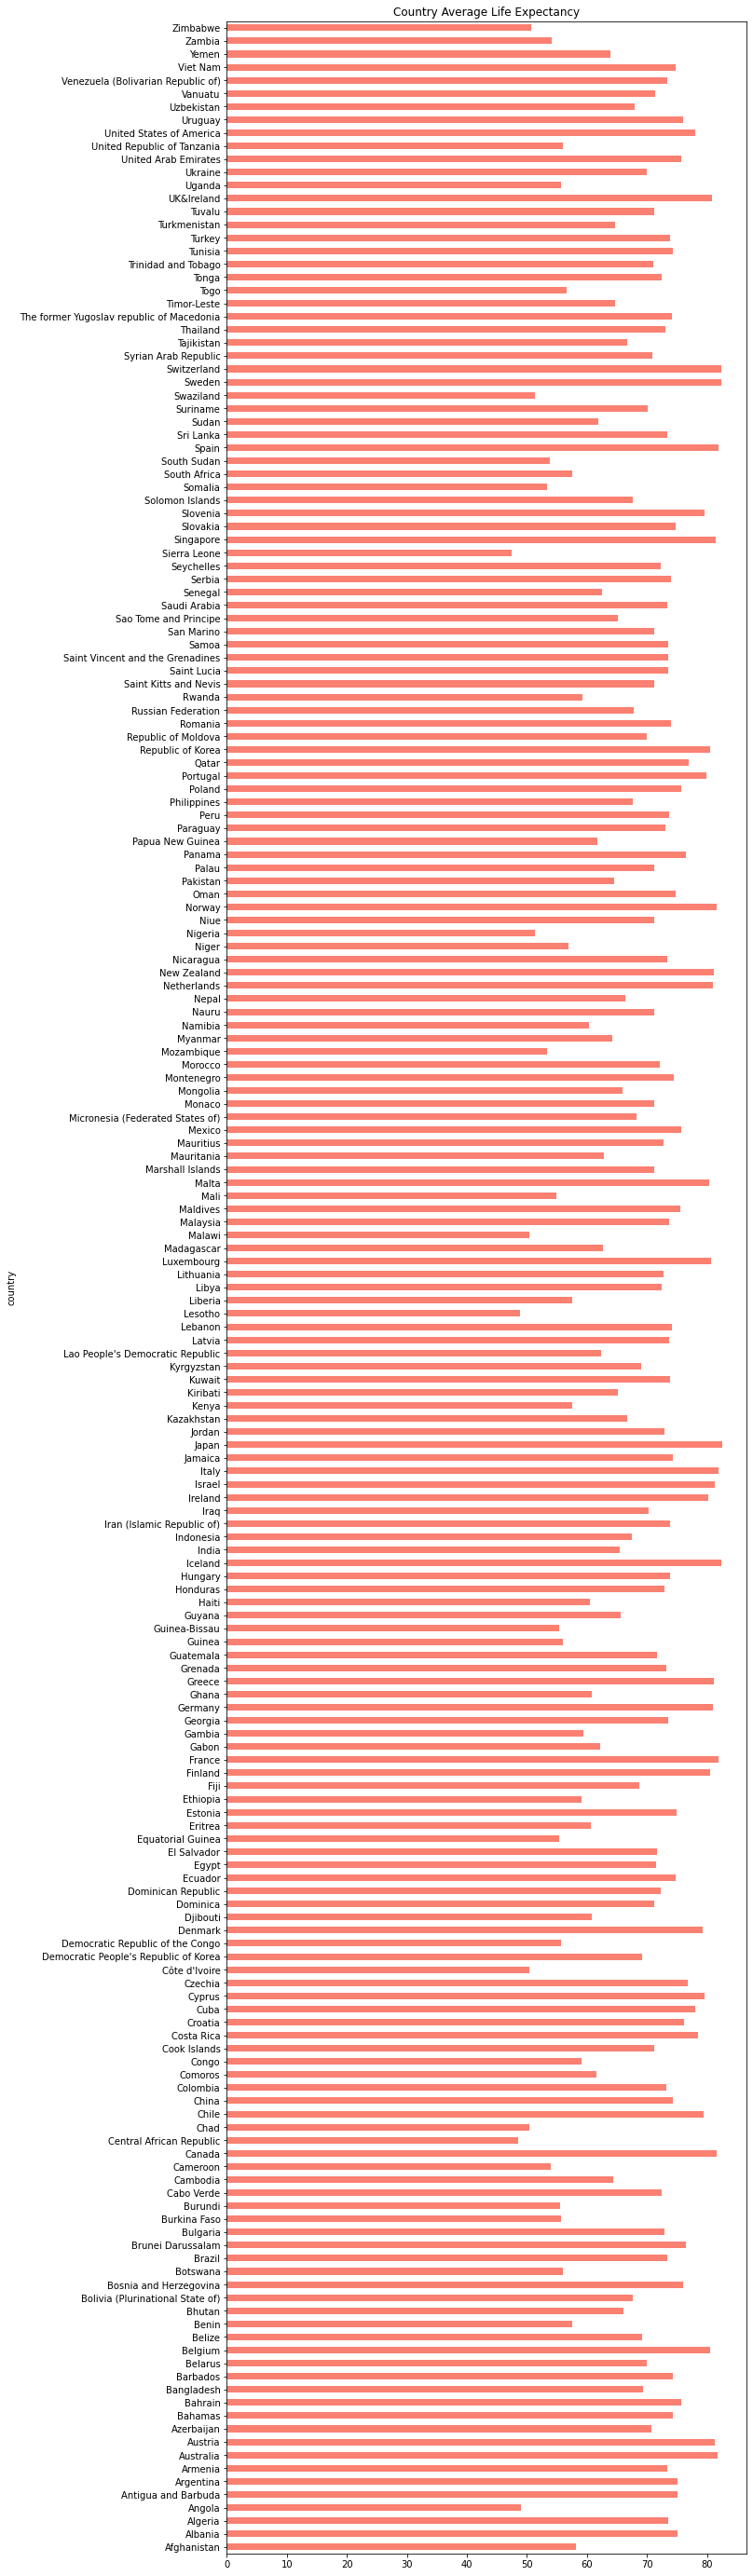

In [ ]:
# country: ÎÇòÎùºÎ≥Ñ ÌèâÍ∑† Í∏∞ÎåÄÏàòÎ™ÖÏùÑ ÎÇòÌÉÄÎÇ∏ barh plot Íµ¨ÌòÑ
wins_df.groupby('country').life_expectancy.mean().plot(kind='barh', figsize=(10,50), color='#FA8072')
plt.title('Country Average Life Expectancy');

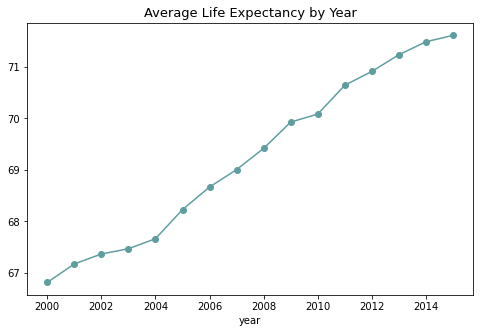

In [ ]:
# year: barplotÏúºÎ°ú Ïó∞ÎèÑÎ≥Ñ ÌèâÍ∑† Í∏∞ÎåÄ ÏàòÎ™Ö Í∑∏Î¶¨Í∏∞
wins_df.groupby('year').life_expectancy.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average Life Expectancy by Year', fontsize=13);

Developing    2426
Developed      512
Name: status, dtype: int64
------------------------------


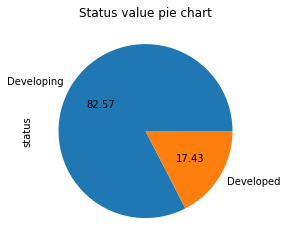

In [ ]:
# status: Î≥ÄÏàòÏùò valueÍ∞Ä Îëê Í∞úÏù¥ÎØÄÎ°ú, Í∞Å ÎπÑÏ§ëÏùÑ pie chartÎ°ú ÏãúÍ∞ÅÌôî
print(wins_df['status'].value_counts()) 

print('-'*30)

wins_df['status'].value_counts().plot(kind='pie', autopct='%.2f')   # developingÏù∏ Íµ≠Í∞ÄÍ∞Ä ÏïΩ 83%Ïù¥Í≥†, developedÏù∏ Íµ≠Í∞ÄÎäî ÏïΩ 17%
plt.title('Status value pie chart');

### 3-2. Ïó∞ÏÜçÌòï Î≥ÄÏàò
    - bmi
    - adult_mortality
    - infant_mortality
    - alcohol
    - percentage_expenditure
    - hepatitis_b
    - measles
    - under-five_mortality
    - polio
    - total_expenditure
    - diphtheria
    - hiv/aids
    - gdp
    - population
    - thin_10-19
    - thin_5-9
    - hdi
    - schooling

Ïóê ÎåÄÌïú EDA Í≥ºÏ†ïÏùÑ ÏßÑÌñâ

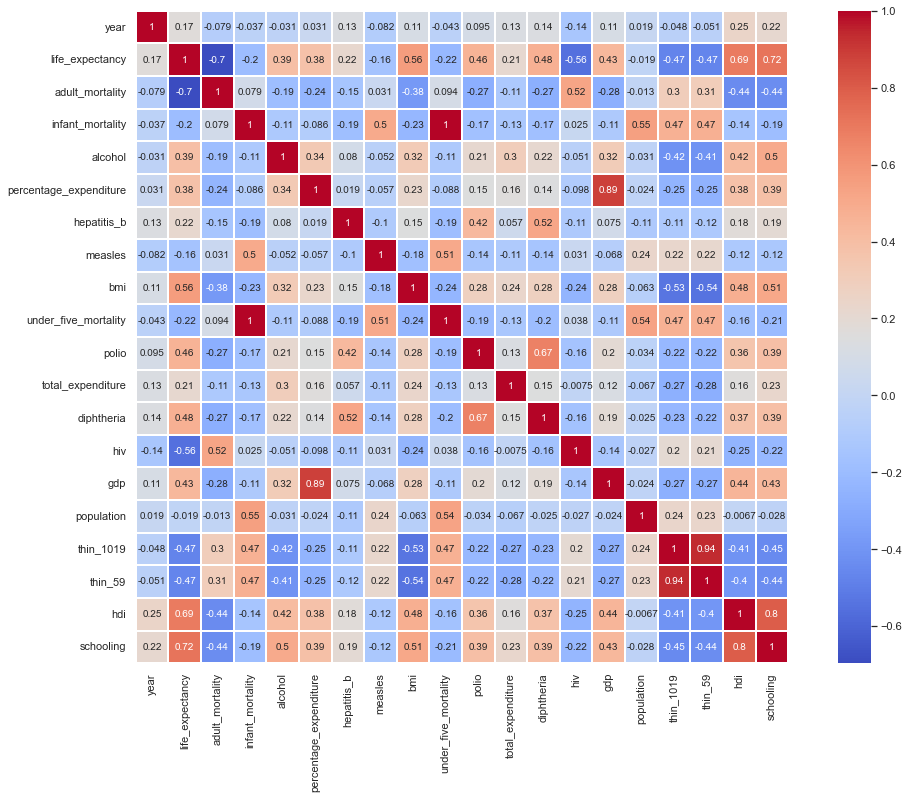

In [39]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖÌïòÍ∏∞ ÏúÑÌïú heatmap
h_cols = df.drop(['country','status'],axis=1).columns   # valueÍ∞Ä categoryÏù∏ Îëê featureÎäî Ï†úÏô∏
sns.set(rc = {'figure.figsize':(18,12)})
sns.heatmap(df[h_cols].astype(float).corr(), linewidths = 0.1, vmax = 1.0, cmap='coolwarm', square = True, linecolor = "white", annot = True, annot_kws = {"size" : 10});

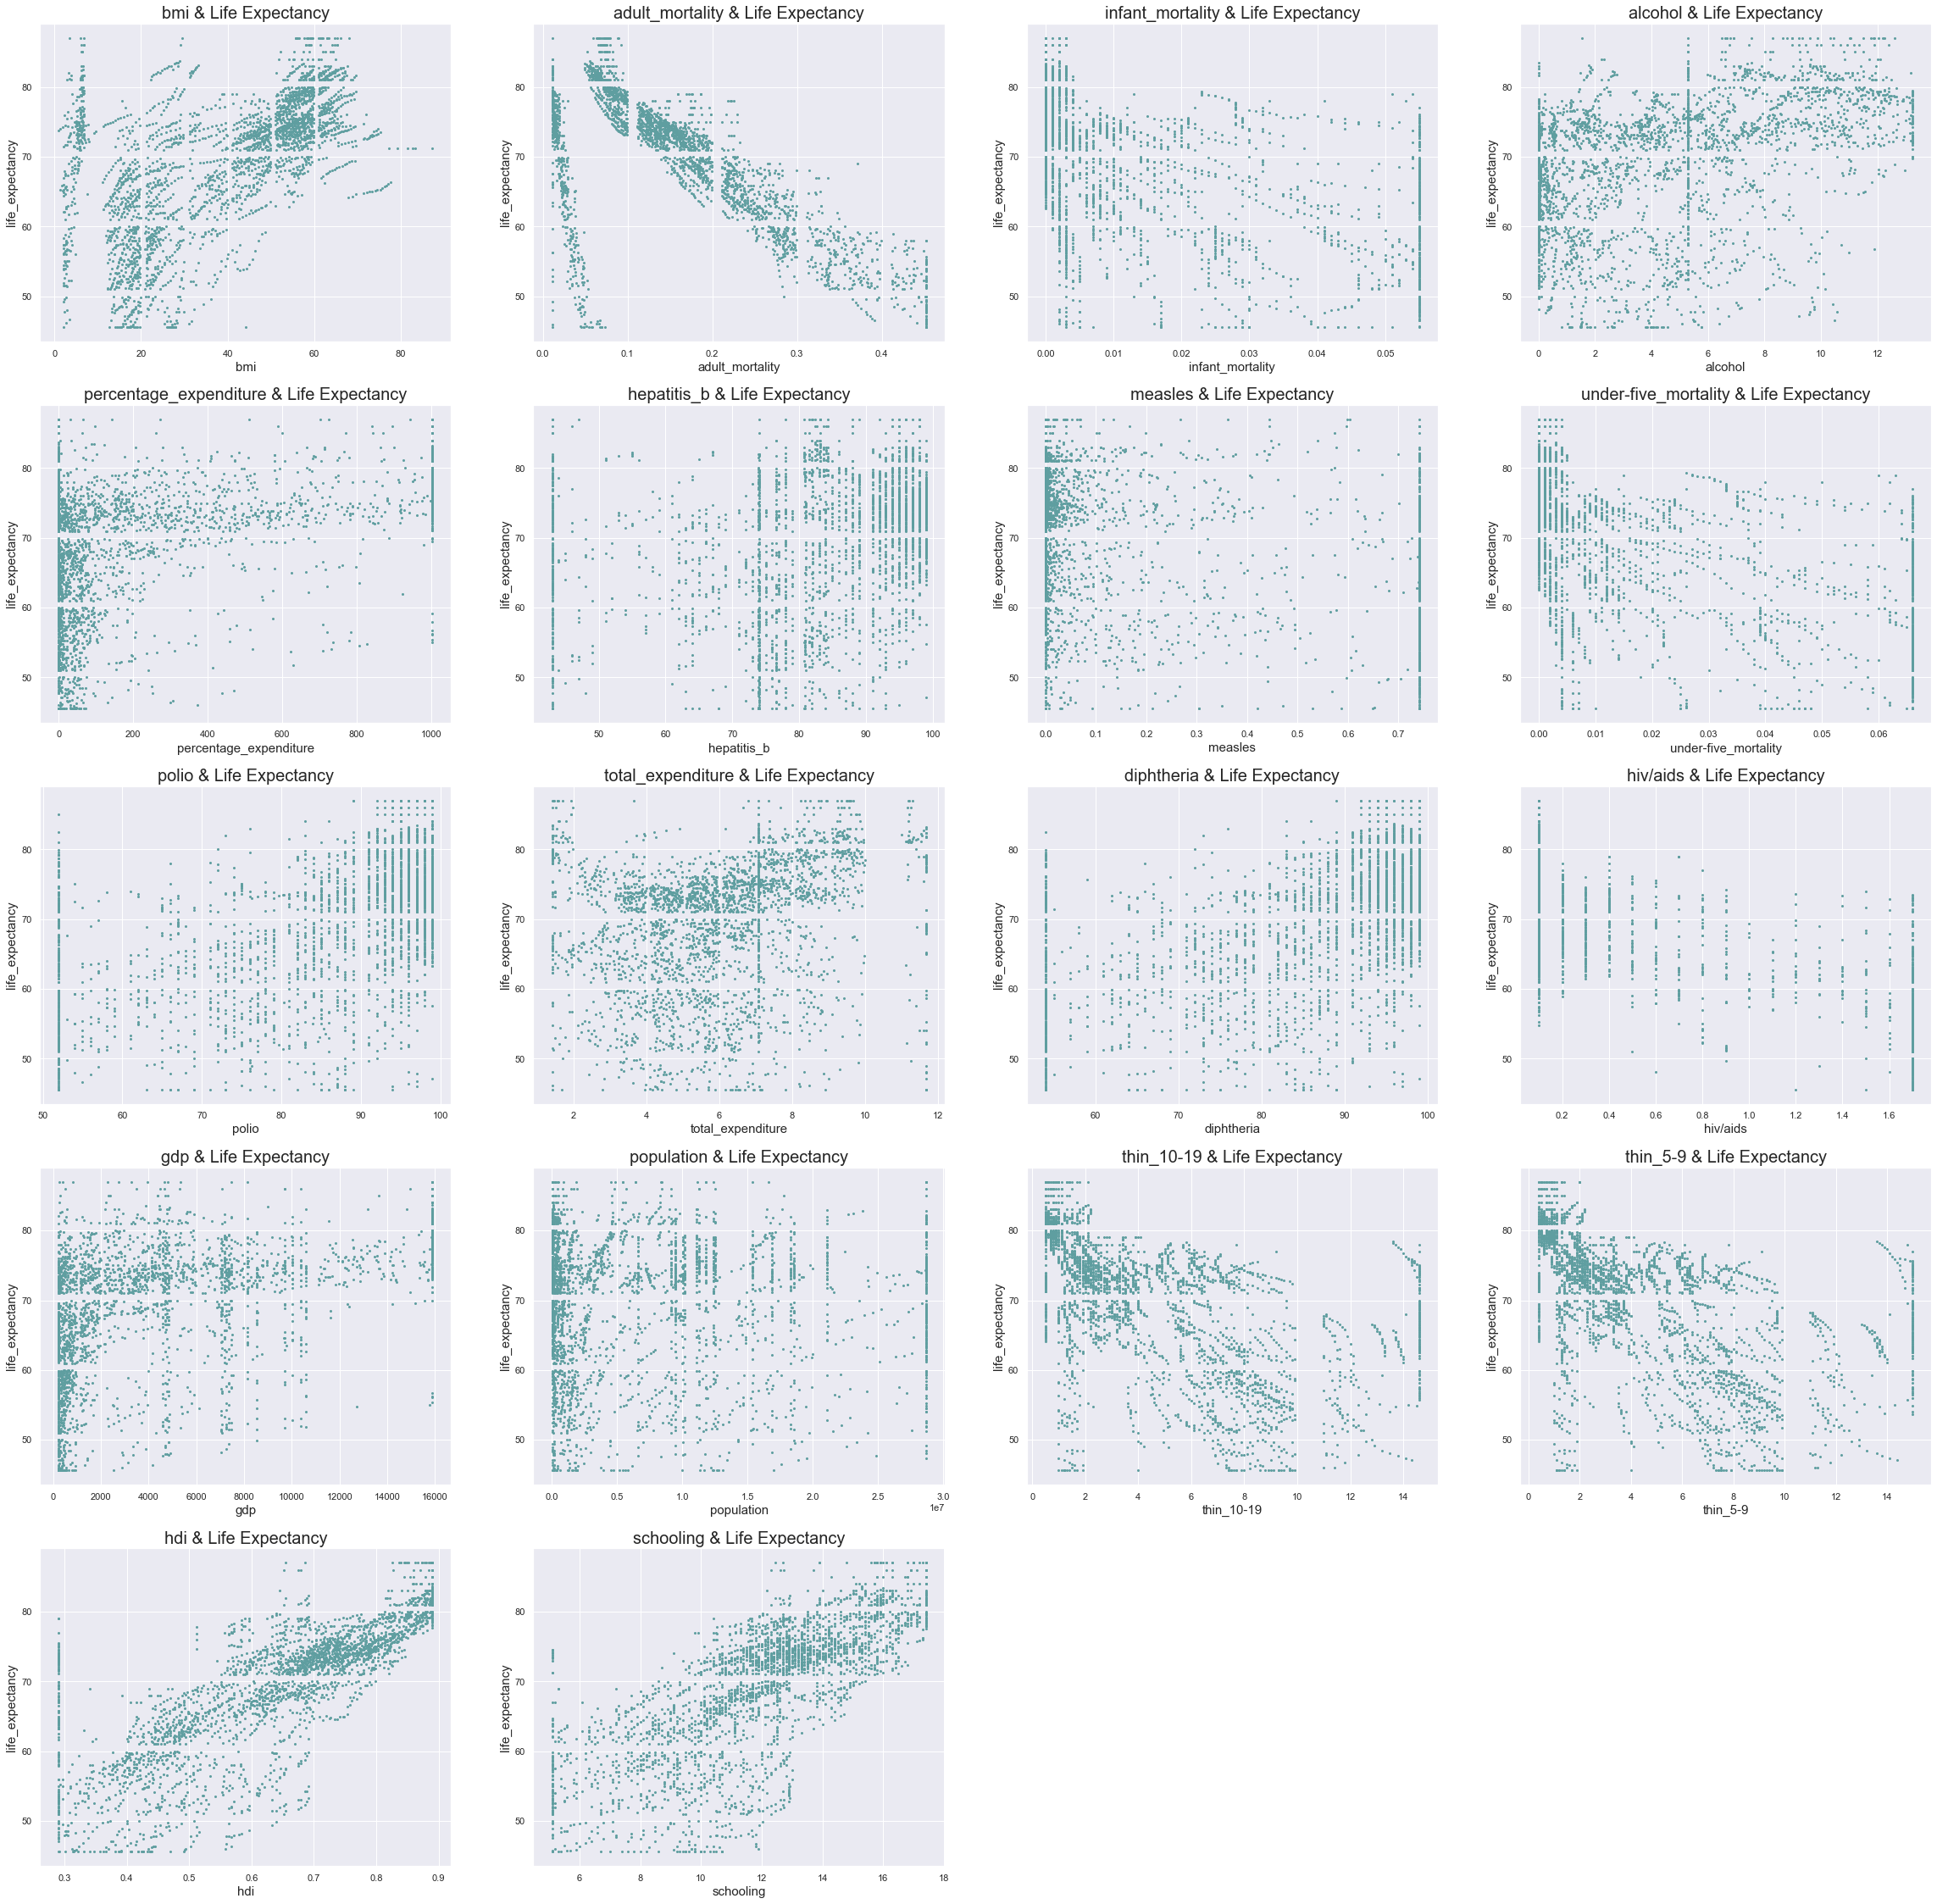

In [ ]:
# Í∞Å Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê Îî∞Î•∏ Í∏∞ÎåÄÏàòÎ™Ö Î≥ÄÌôîÎ•º ÏÇ∞Ï†êÎèÑÎ°ú ÏÇ¥Ìé¥Î≥¥Í∏∞
wincol_list = wins_df.drop(['life_expectancy', 'country', 'year', 'status'],axis=1).columns

def make_scatter(df, list):
    plt.figure(figsize=(40, 40))
    x=0

    for n in list:
        x += 1
        plt.subplot(5, 4, x)
        plt.scatter(df[n], df['life_expectancy'], s = 4, color='#5F9EA0')
        plt.title('{} & Life Expectancy'.format(n), fontsize=20) 
        plt.xlabel('{}'.format(n), fontsize=15)
        plt.ylabel('life_expectancy', fontsize=15)
    plt.show();

make_scatter(wins_df, wincol_list)

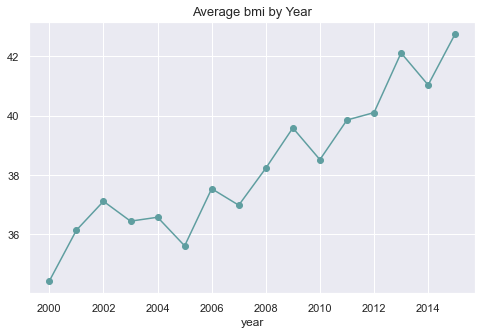

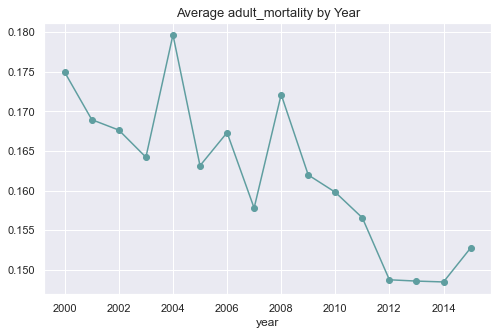

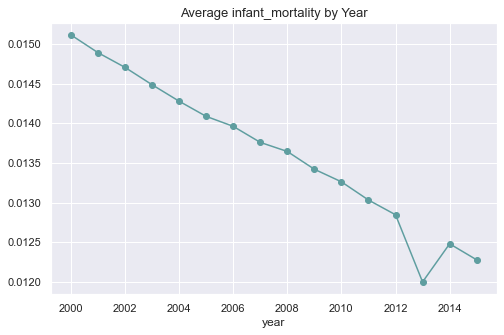

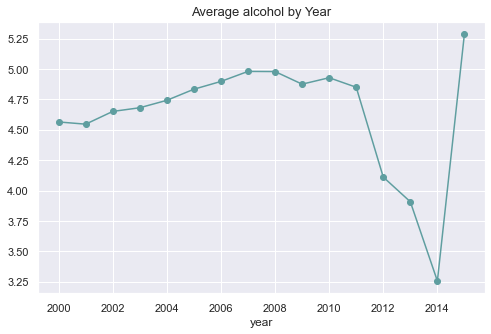

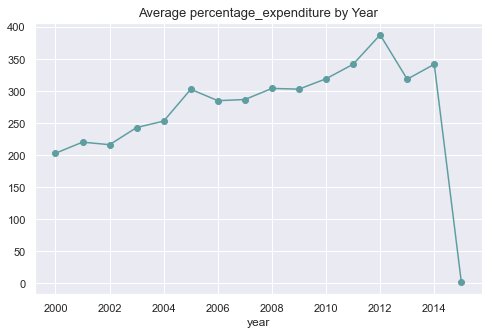

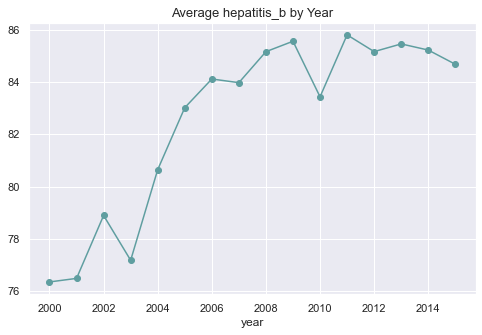

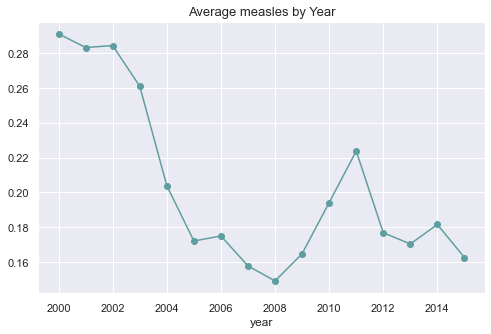

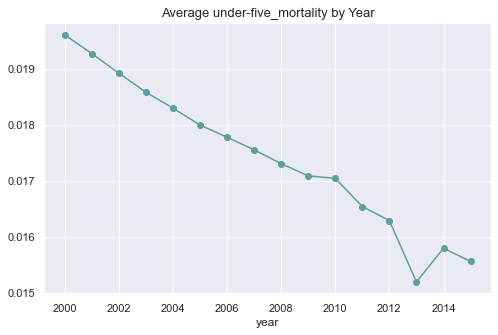

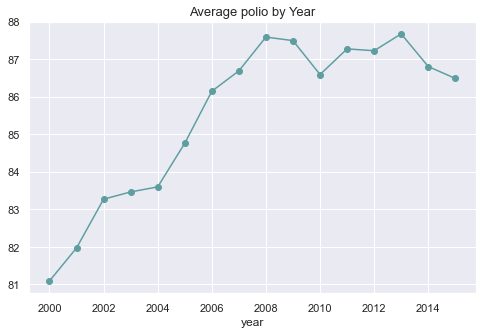

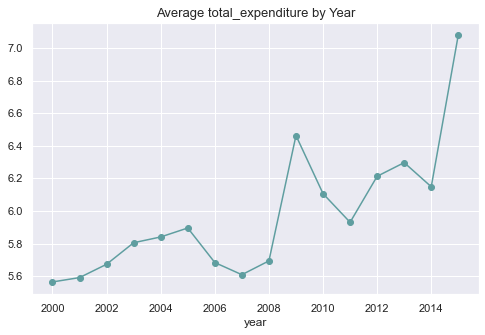

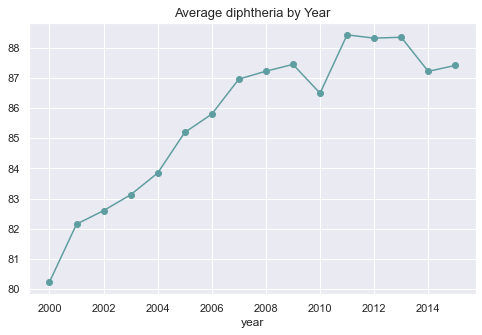

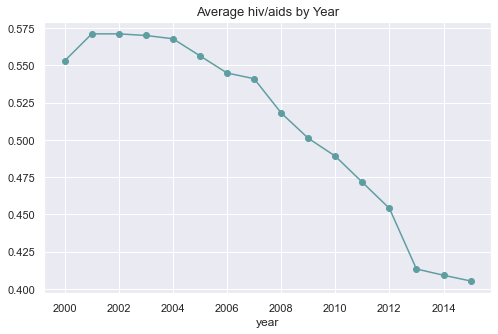

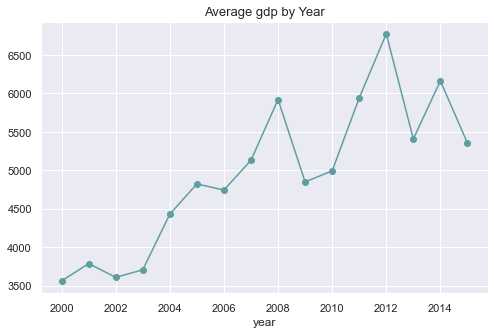

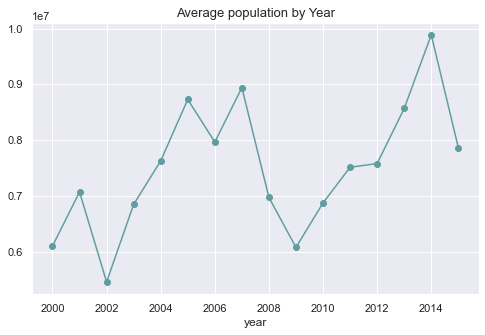

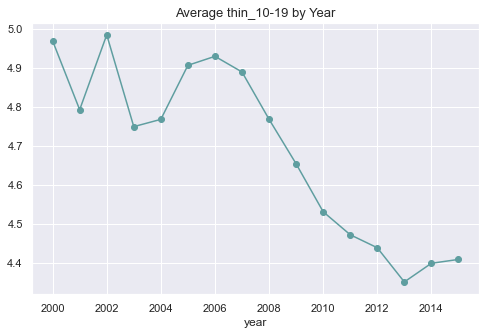

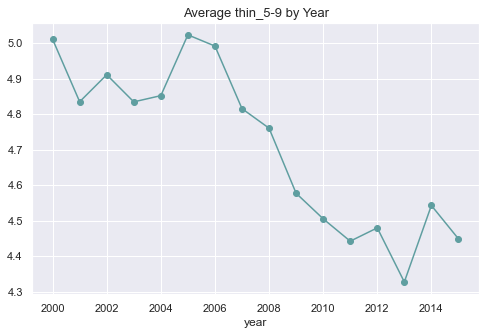

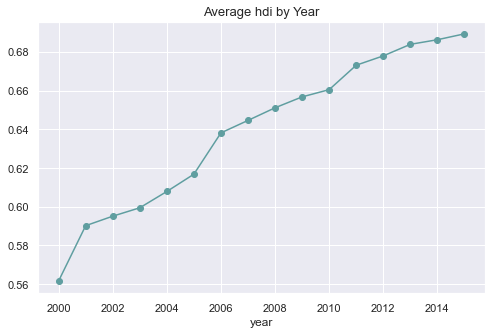

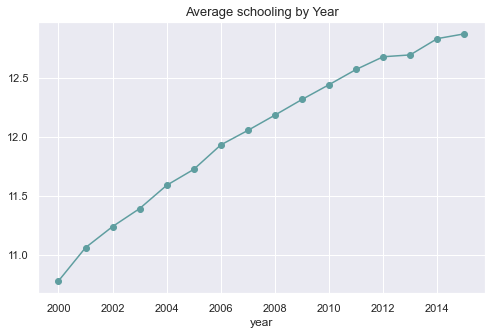

In [ ]:
# Í∞Å Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Ïó∞ÎèÑÎ≥Ñ Î≥ÄÌôî Ï∂îÏù¥
wincol_list = wins_df.drop(['life_expectancy', 'country', 'year', 'status'],axis=1).columns

plt.figure(figsize=(10, 10))
wins_df.groupby('year').bmi.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average bmi by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').adult_mortality.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average adult_mortality by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').infant_mortality.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average infant_mortality by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').alcohol.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average alcohol by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').percentage_expenditure.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average percentage_expenditure by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').hepatitis_b.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average hepatitis_b by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').measles.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average measles by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').under_five_mortality.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average under-five_mortality by Year', fontsize=13)


plt.figure(figsize=(10, 10))
wins_df.groupby('year').polio.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average polio by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').total_expenditure.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average total_expenditure by Year', fontsize=13)


plt.figure(figsize=(10, 10))
wins_df.groupby('year').diphtheria.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average diphtheria by Year', fontsize=13)


plt.figure(figsize=(10, 10))
wins_df.groupby('year').hiv.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average hiv/aids by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').gdp.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average gdp by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').population.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average population by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').thin_1019.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average thin_10-19 by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').thin_59.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average thin_5-9 by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').hdi.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average hdi by Year', fontsize=13)

plt.figure(figsize=(10, 10))
wins_df.groupby('year').schooling.mean().plot(kind = 'line', marker='o', figsize=(8,5), color='#5F9EA0')
plt.title('Average schooling by Year', fontsize=13)

plt.show();

### 3-3. Í∞Å Ïó∞ÎèÑÎ≥Ñ Í∏∞ÎåÄÏàòÎ™ÖÏù¥ Í∞ÄÏû• Í∏¥ ÎÇòÎùº top 5 ÏãúÍ∞ÅÌôî
- Í∞Å Ïó∞ÎèÑÎ≥ÑÎ°ú Í∏∞ÎåÄÏàòÎ™ÖÏù¥ Í∞ÄÏû• Í∏¥ top5Î•º Ï∂îÏ∂úÌï¥ ÏãúÍ∞ÅÌôîÌï¥Î≥∏Îã§.

In [ ]:
# (1) Í∞Å Ïó∞ÎèÑÎ≥Ñ Í∏∞ÎåÄÏàòÎ™Ö top 5Ïùò Íµ≠Í∞Ä/Í∏∞ÎåÄÏàòÎ™Ö/ÎÖÑÎèÑÎ•º Î¶¨Ïä§Ìä∏Ïóê Ï†ÄÏû•
top_5 = []
year_list = list(wins_df['year'].unique())
for i in year_list:
    top5 = wins_df[wins_df['year'] == i].nlargest(5, 'life_expectancy')[['country', 'life_expectancy', 'year']]
    top_5.append(top5)

top5_2015 = pd.DataFrame(top_5[0], columns = ['country', 'life_expectancy', 'year'])
top5_2014 = pd.DataFrame(top_5[1], columns = ['country', 'life_expectancy', 'year'])
top5_2013 = pd.DataFrame(top_5[2], columns = ['country', 'life_expectancy', 'year'])
top5_2012 = pd.DataFrame(top_5[3], columns = ['country', 'life_expectancy', 'year'])
top5_2011 = pd.DataFrame(top_5[4], columns = ['country', 'life_expectancy', 'year'])
top5_2010 = pd.DataFrame(top_5[5], columns = ['country', 'life_expectancy', 'year'])
top5_2009 = pd.DataFrame(top_5[6], columns = ['country', 'life_expectancy', 'year'])
top5_2008 = pd.DataFrame(top_5[7], columns = ['country', 'life_expectancy', 'year'])
top5_2007 = pd.DataFrame(top_5[8], columns = ['country', 'life_expectancy', 'year'])
top5_2006 = pd.DataFrame(top_5[9], columns = ['country', 'life_expectancy', 'year'])
top5_2005 = pd.DataFrame(top_5[10], columns = ['country', 'life_expectancy', 'year'])
top5_2004 = pd.DataFrame(top_5[11], columns = ['country', 'life_expectancy', 'year'])
top5_2003 = pd.DataFrame(top_5[12], columns = ['country', 'life_expectancy', 'year'])
top5_2002 = pd.DataFrame(top_5[13], columns = ['country', 'life_expectancy', 'year'])
top5_2001 = pd.DataFrame(top_5[14], columns = ['country', 'life_expectancy', 'year'])
top5_2000 = pd.DataFrame(top_5[15], columns = ['country', 'life_expectancy', 'year'])

# (3) ÌïòÎÇòÏùò dfÎ°ú Î≥ëÌï©
top5_li = [top5_2015, top5_2014, top5_2013, top5_2012, top5_2011, top5_2010, top5_2009, top5_2008, top5_2007, top5_2006, top5_2005, top5_2004, top5_2003, 
top5_2002, top5_2001, top5_2000]

top5_all = pd.concat(top5_li, ignore_index=True)
top5_all.head()

country  life_expectancy  year
0  Slovenia             87.0  2015
1   Denmark             86.0  2015
2     Chile             85.0  2015
3    Cyprus             85.0  2015
4     Japan             83.7  2015

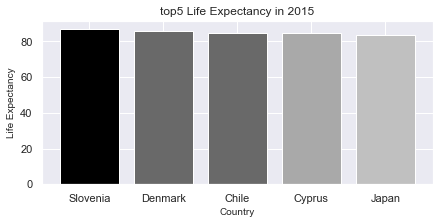

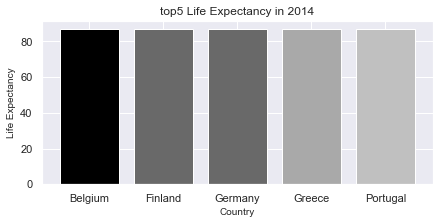

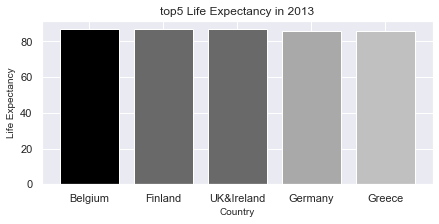

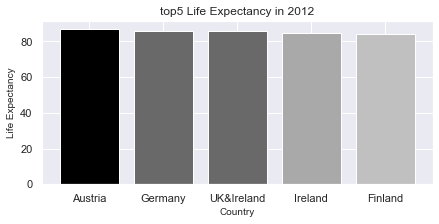

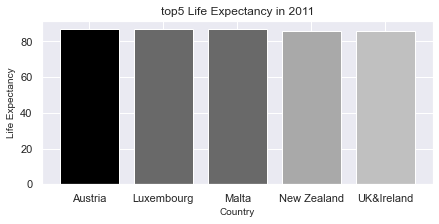

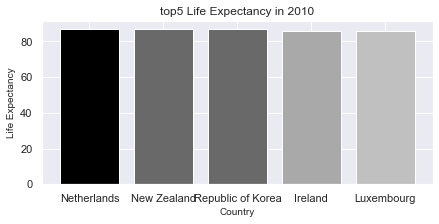

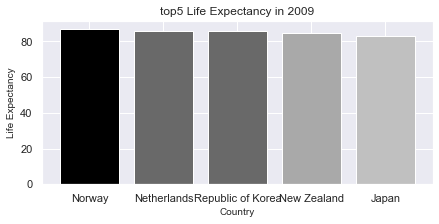

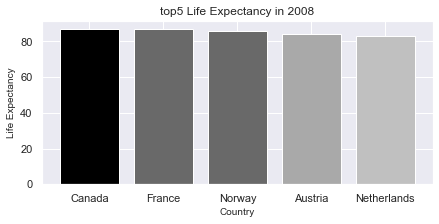

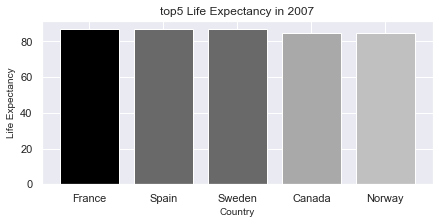

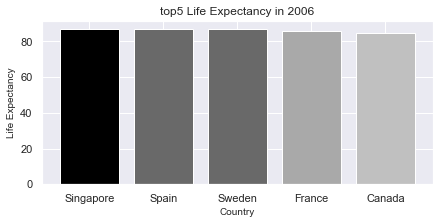

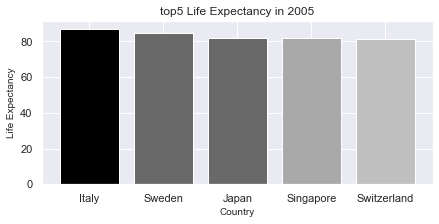

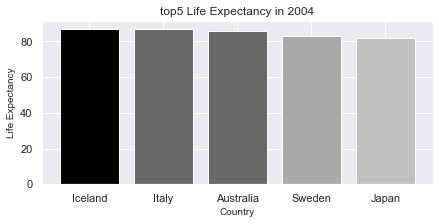

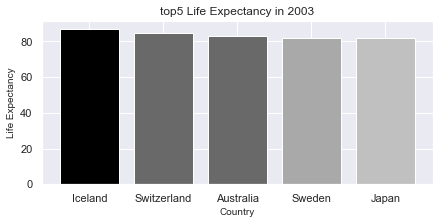

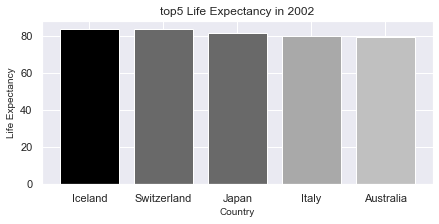

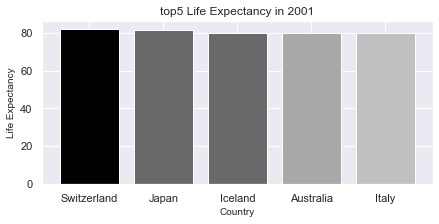

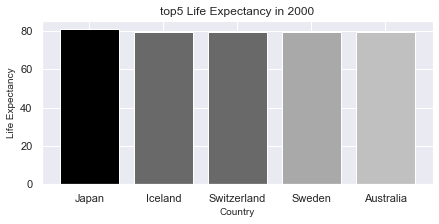

In [ ]:
# (4) Í∞Å Ïó∞ÎèÑÎ≥Ñ top5 ÏãúÍ∞ÅÌôî
# x=0
for y in year_list:
    plt.figure(figsize=(7, 3))
    colors = ['black','dimgray','dimgrey','darkgray','silver','lightgrey']

    # x += 1
    # plt.subplot(6, 3, x)

    plt.bar(top5_all[top5_all['year']==y].iloc[:, 0], top5_all[top5_all['year']==y].iloc[:, 1], color=colors)
    plt.title('top5 Life Expectancy in {}'.format(y), fontsize=12) 
    plt.xlabel('Country', fontsize=10)
    plt.ylabel('Life Expectancy', fontsize=10)
plt.show();

- Ïó∞ÎèÑÎ≥Ñ top5 Í∑∏ÎûòÌîÑÏóêÏÑú 4Î≤à Ïù¥ÏÉÅ Îì±Ïû•Ìïú Íµ≠Í∞ÄÎì§Ïùò Ïó∞ÎèÑÎ≥Ñ Í∏∞ÎåÄÏàòÎ™ÖÏùÑ barplotÏúºÎ°ú ÏãúÍ∞ÅÌôîÌïòÏó¨ ÏâΩÍ≤å ÌååÏïÖÌï¥Î≥∏Îã§

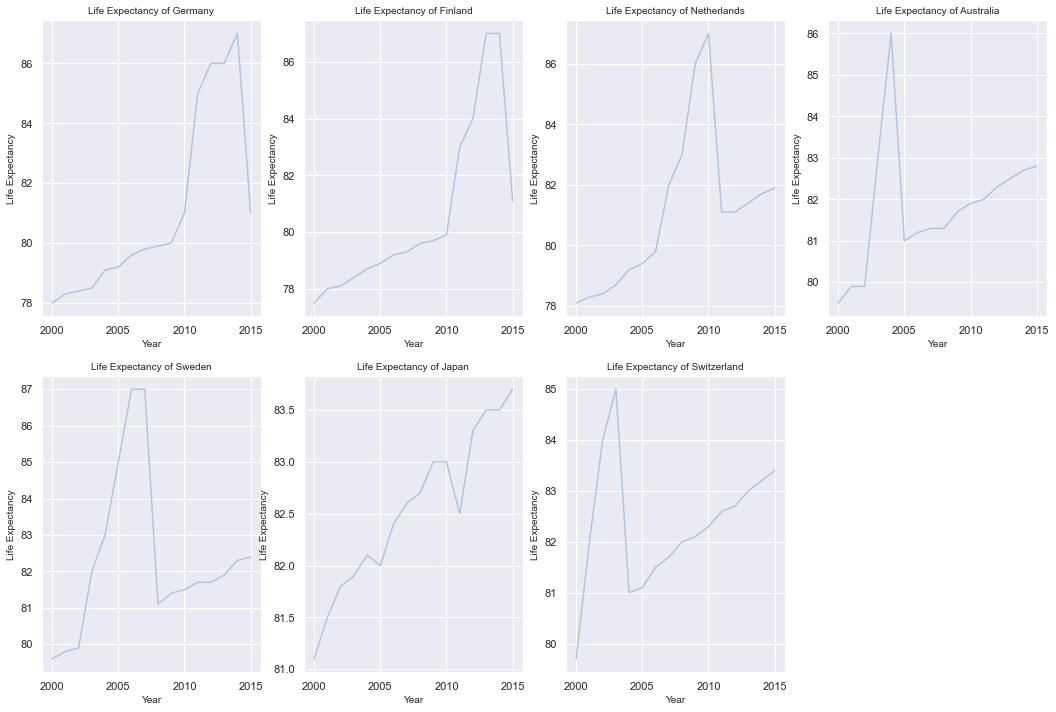

In [ ]:
# Ìï¥Îãπ Íµ≠Í∞Ä Î™ÖÎã® ÏÉùÏÑ±ÌïòÍ∏∞
countries = ['Germany', 'Finland', 'Netherlands', 'Australia', 'Sweden', 'Japan', 'Switzerland']

# barplotÏúºÎ°ú Í∞Å Íµ≠Í∞Ä Ïó∞ÎèÑÎ≥Ñ Í∏∞ÎåÄÏàòÎ™Ö ÏãúÍ∞ÅÌôîÌïòÍ∏∞

x=0

for c in countries:
    x += 1
    plt.subplot(2, 4, x)

    top_df = wins_df[wins_df['country']== c][['year', 'life_expectancy']]
    plt.plot(top_df['year'], top_df['life_expectancy'], color='#B0C4DE')
    plt.title('Life Expectancy of {}'.format(c), fontsize=10) 
    plt.xlabel('Year', fontsize=10)
    plt.ylabel('Life Expectancy', fontsize=10)
plt.show();

In [ ]:
# GDP top10Îßå ÎΩëÏïÑÏÑú Î≥¥Í∏∞
wins_df.nlargest(10, 'gdp')

country  year      status   bmi  life_expectancy  adult_mortality  \
112   Australia  2015   Developed  66.6             82.8            0.059   
128     Austria  2015   Developed  57.6             81.5            0.065   
176     Bahrain  2015  Developing  63.6             76.9            0.069   
496      Canada  2015  Developing  67.0             82.2            0.064   
930      France  2015  Developing  62.5             82.4            0.078   
994     Germany  2015   Developed  62.3             81.0            0.068   
1266     Israel  2015  Developing  64.9             82.5            0.058   
1314      Japan  2015   Developed  29.0             83.7            0.055   
1394     Kuwait  2015  Developing  71.4             74.7            0.081   
1634      Malta  2015   Developed  69.6             81.7            0.054   

      infant_mortality   alcohol  percentage_expenditure  hepatitis_b  ...  \
112              0.001  5.288333                     0.0    93.000000  ...   
128              0.000  5.288333                     0.0    93.000000  ...   
176              0.000  5.288333                     0.0    98.000000  ...   
496              0.002  5.288333                     0.0    55.000000  ...   
930              0.002  5.288333                     0.0    86.000000  ...   
994              0.002  5.288333                     0.0    88.000000  ...   
1266             0.000  5.288333                     0.0    96.000000  ...   
1314             0.002  5.288333                     0.0    82.425287  ...   
1394             0.000  5.288333                     0.0    99.000000  ...   
1634             0.000  5.288333                     0.0    95.000000  ...   

      polio  total_expenditure  diphtheria  hiv/aids         gdp  \
112    93.0               7.08        93.0       0.1  15893.8656   
128    93.0               7.08        93.0       0.1  15893.8656   
176    98.0               7.08        98.0       0.1  15893.8656   
496    91.0               7.08        91.0       0.1  15893.8656   
930    98.0               7.08        98.0       0.1  15893.8656   
994    94.0               7.08        95.0       0.1  15893.8656   
1266   95.0               7.08        95.0       0.1  15893.8656   
1314   99.0               7.08        96.0       0.1  15893.8656   
1394   99.0               7.08        99.0       0.1  15893.8656   
1634   97.0               7.08        97.0       0.1  15893.8656   

        population  thin_10-19  thin_5-9    hdi  schooling  
112   2.378934e+07         0.6       0.6  0.890       17.4  
128   8.633169e+06         1.9       2.1  0.890       15.9  
176   1.109741e+07         6.2       6.1  0.823       14.5  
496   3.584861e+06         0.6       0.5  0.890       16.3  
930   6.662468e+06         0.7       0.6  0.890       16.3  
994   2.865628e+07         1.1       1.1  0.890       17.1  
1266  2.427100e+04         1.2       1.1  0.890       16.0  
1314  1.271410e+05         2.1       1.8  0.890       15.3  
1394  1.109741e+07         3.5       3.4  0.799       13.3  
1634  4.318740e+05         0.8       0.8  0.853       14.6  

[10 rows x 22 columns]

In [ ]:
# Í∏∞ÎåÄÏàòÎ™Ö top10Îßå ÎΩëÏïÑÏÑú Î≥¥Í∏∞
wins_df.nlargest(10, 'life_expectancy')[['country','status', 'bmi', 'life_expectancy','percentage_expenditure', 'total_expenditure',
'gdp', 'hdi','schooling']]

country      status   bmi  life_expectancy  percentage_expenditure  \
2345    Slovenia   Developed   6.1             87.0                0.000000   
241      Belgium   Developed  63.4             87.0             1002.833273   
915      Finland  Developing  61.7             87.0             1002.833273   
995      Germany   Developed  61.9             87.0              941.756291   
1027      Greece  Developing  66.0             87.0             1002.833273   
2056    Portugal   Developed   6.9             87.0              271.254553   
2346    Slovenia   Developed  59.5             87.0               31.134928   
242      Belgium   Developed  63.0             87.0              702.359357   
916      Finland  Developing  61.4             87.0             1002.833273   
2764  UK&Ireland   Developed  65.4             87.0                0.000000   

      total_expenditure           gdp       hdi  schooling  
2345               7.08   2729.863830  0.888000  17.300000  
241                1.59  15893.865600  0.890000  16.300000  
915                9.68  15893.865600  0.890000  17.000000  
995               11.30   4792.652880  0.890000  17.000000  
1027               8.80  15893.865600  0.862000  17.200000  
2056               9.50   2277.536130  0.837000  16.800000  
2346               9.23    242.672860  0.888000  17.400000  
242                1.57   4651.386470  0.889000  16.300000  
916                9.55  15893.865600  0.887000  17.000000  
2764               9.34   8152.675657  0.685648  12.688333

## 4. Í∞ÄÏÑ§ Í≤ÄÏ†ï
    1. ÏïÑÎèôÏù¥ Í±¥Í∞ïÌï†ÏàòÎ°ù Í∏∞ÎåÄÏàòÎ™ÖÏùÄ Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥Îã§.
    2. Íµ≠Í∞ÄÍ∞Ä ÏÑ†ÏßÑÌôîÎê†ÏàòÎ°ù Í∏∞ÎåÄÏàòÎ™ÖÏù¥ Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥Îã§.
    3. Í±¥Í∞ïÏùÑ ÏúÑÌïú ÏßÄÏ∂úÏù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Í∏∞ÎåÄÏàòÎ™ÖÏùÄ ÎäòÏñ¥ÎÇ† Í≤ÉÏù¥Îã§.

### Í∞ÄÏÑ§ 1Ïóê ÎåÄÌïú Í≤ÄÏ†ï

In [ ]:
# 1Î≤à Í∞ÄÏÑ§: ÏïÑÎèô(=Ïú†ÏïÑ+5ÏÑ∏ÎØ∏Îßå ÏïÑÎèô)Ïùò ÏÇ¨ÎßùÎ•†Ïù¥ ÎÇÆÏïÑÏßÄÍ≥† Î©¥Ïó≠Î†•Ïù¥ Ìñ•ÏÉÅÌï†ÏàòÎ°ù Í∏∞ÎåÄ ÏàòÎ™ÖÏùÄ ÎäòÏñ¥ÎÇ† Í≤É
## infantÍ∞Ä under-five ageÏù¥ÎØÄÎ°ú under-five_mortalityÏôÄ Í∏∞ÎåÄ ÏàòÎ™Ö Í∞ÑÏùò chi-sqaure test ÏßÑÌñâ
chi_res1 = chi2_contingency(pd.crosstab(wins_df['under_five_mortality'], wins_df['life_expectancy']))
print('under-five_mortality & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_res1[0], chi_res1[1]))

## hiv/aids & life_expectancy Í∞ÑÏùò Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌïú chi-sqaure test
chi_resha = chi2_contingency(pd.crosstab(wins_df['hiv'], wins_df['life_expectancy']))
print('hiv/aids & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_resha[0], chi_resha[1]))


under-five_mortality & life_expectancy_Chi2 Statistic: 29611.57846872826, p-value: 9.522686675835971e-201
hiv/aids & life_expectancy_Chi2 Statistic: 8855.141355040214, p-value: 2.5696170719655874e-165


In [ ]:
# hepatitis_b, polio, diphtheria, thin_5-9, thin_10-19ÏôÄ Í∏∞ÎåÄ ÏàòÎ™Ö Í∞ÑÏùò chi-sqaure test ÏßÑÌñâ

## hepatitis_b & life_expectancy
chi_resh = chi2_contingency(pd.crosstab(wins_df['hepatitis_b'], wins_df['life_expectancy']))
print('hepatitis_b & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_resh[0], chi_resh[1]))

## polio & life_expectancy
chi_resp = chi2_contingency(pd.crosstab(wins_df['polio'], wins_df['life_expectancy']))
print('polio & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_resp[0], chi_resp[1]))

## diphtheria & life_expectancy
chi_resd = chi2_contingency(pd.crosstab(wins_df['diphtheria'], wins_df['life_expectancy']))
print('diphtheria & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_resd[0], chi_resd[1]))

## thin_5-9 & life_expectancy
chi_rest5 = chi2_contingency(pd.crosstab(wins_df['thin_59'], wins_df['life_expectancy']))
print('thin_5-9 & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_rest5[0], chi_rest5[1]))

## thin_10-19 & life_expectancy
chi_rest10 = chi2_contingency(pd.crosstab(wins_df['thin_1019'], wins_df['life_expectancy']))
print('thin_10-19 & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_rest10[0], chi_rest10[1]))


hepatitis_b & life_expectancy_Chi2 Statistic: 27315.090686825264, p-value: 6.180266107590174e-84
polio & life_expectancy_Chi2 Statistic: 24343.109944844018, p-value: 1.0631422486925803e-170
diphtheria & life_expectancy_Chi2 Statistic: 22447.776672257183, p-value: 7.111798349366706e-116
thin_5-9 & life_expectancy_Chi2 Statistic: 66219.16137456826, p-value: 0.0
thin_10-19 & life_expectancy_Chi2 Statistic: 65523.30987066072, p-value: 0.0


##### ‚úÖ ÏúÑ Îã§ÏÑØ Í∞ÄÏßÄ Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏóêÏÑú p-valueÍ∞Ä Î™®Îëê 0Ïù¥Í±∞ÎÇò 0Ïóê ÏàòÎ†¥ÌïòÎäî Í∞íÏù¥ÎØÄÎ°ú 7 Í∞ÄÏßÄ Î≥ÄÏàò Î™®Îëê `Í∏∞ÎåÄ ÏàòÎ™Ö`Í≥º Ïó∞Í¥ÄÏù¥ ÏûàÎã§Í≥† Ìï† Ïàò ÏûàÎã§.
#### üî• Í≤∞Î°† : ÌÜµÍ≥ÑÏ†Å Í∞ÄÏÑ§ Í≤ÄÏ†ïÍ≥º Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÏïÑÎèôÏù¥ Í±¥Í∞ïÌï†ÏàòÎ°ù Í∏∞ÎåÄ ÏàòÎ™ÖÏù¥ Ï¶ùÍ∞ÄÌï† Í≤ÉÏù¥ÎùºÎäî Í∞ÄÏÑ§ 1Ïù¥ ÏÑ±Î¶ΩÌï† Ïàò ÏûàÎã§.
-------

### Í∞ÄÏÑ§ 2Ïóê ÎåÄÌïú Í≤ÄÏ†ï

In [ ]:
# 2Î≤à Í∞ÄÏÑ§ t-test: statusÏóê Îî∞Îùº Îç∞Ïù¥ÌÑ∞Î•º Îëê ÏßëÎã®ÏúºÎ°ú ÎÇòÎàÑÏóàÏùÑ ÎïåÏùò ÌèâÍ∑† Í∏∞ÎåÄ ÏàòÎ™Ö Í∞ÑÏùò Ï∞®Ïù¥
# Î®ºÏ†Ä statusÎ•º Í∏∞Ï§ÄÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
wins_ed = wins_df[wins_df.status =='Developed']
wins_ing = wins_df[wins_df.status =='Developing']

wins_ed.shape, wins_ing.shape

((512, 22), (2426, 22))

In [ ]:
# t-test Í≤∞Í≥º: Îëê ÏßëÎã®Ïùò ÌèâÍ∑† Í∏∞ÎåÄÏàòÎ™Ö Ï∞®Ïù¥ ÌôïÏù∏
from scipy import stats
stats.ttest_ind(wins_ed['life_expectancy'], wins_ing['life_expectancy'])  # pvalue=4.238344691910959e-171: Í∞íÏù¥ 0Ïóê Í∞ÄÍπåÏö¥ ÏûëÏùÄ Í∞í

Ttest_indResult(statistic=29.83822176865006, pvalue=4.238344691910959e-171)

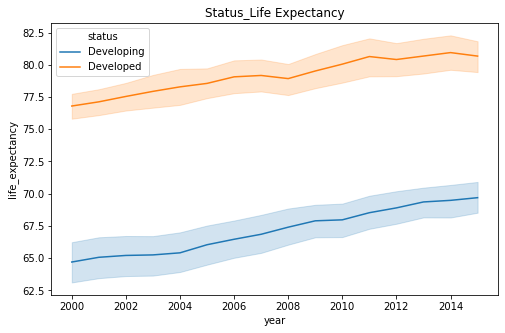

In [ ]:
# Í∑∏ÎûòÌîÑÎ°ú Îëê ÏßëÎã®Ïùò ÌèâÍ∑† Í∏∞ÎåÄ ÏàòÎ™Ö Ï∞®Ïù¥ ÌôïÏù∏
developed_df = wins_df[['life_expectancy', 'year', 'status']]
plt.figure(figsize=(8, 5))
status_devel = sns.lineplot(data = developed_df, y='life_expectancy', x='year', hue='status')
status_devel.set(title = "Status_Life Expectancy");

##### ‚úÖ statusÏóê Îî∞Î•∏ Îëê ÏßëÎã® Í∞ÑÏùò ÌèâÍ∑† Í∏∞ÎåÄÏàòÎ™ÖÏï† Î∂ÑÎ™ÖÌïú Ï∞®Ïù¥Í∞Ä ÏûàÏùåÏùÑ ÏãúÍ∞ÅÏ†ÅÏúºÎ°úÎèÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

In [ ]:
# schooling & life_expectancy Í∞Ñ chi-square test: Îëê Î≥ÄÏàò Í∞ÑÏùò Ïó∞Í¥ÄÏÑ± ÌôïÏù∏
chi_res1 = chi2_contingency(pd.crosstab(wins_df['schooling'], wins_df['life_expectancy']))
print('schooling & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_res1[0], chi_res1[1]))

# hdi & life_expectancy Í∞Ñ chi-square test: Îëê Î≥ÄÏàò Í∞ÑÏùò Ïó∞Í¥ÄÏÑ± ÌôïÏù∏
chi_res2 = chi2_contingency(pd.crosstab(wins_df['hdi'], wins_df['life_expectancy']))
print('hdi & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_res2[0], chi_res2[1]))

# hdi & schooling Í∞Ñ chi-square test: Îëê Î≥ÄÏàò Í∞ÑÏùò Ïó∞Í¥ÄÏÑ± ÌôïÏù∏
chi_res3 = chi2_contingency(pd.crosstab(wins_df['hdi'], wins_df['schooling']))
print('hdi & schooling_Chi2 Statistic: {}, p-value: {}'.format(chi_res3[0], chi_res3[1]))

# gdp & life_expectancy Í∞Ñ chi-square test: Îëê Î≥ÄÏàò Í∞ÑÏùò Ïó∞Í¥ÄÏÑ± ÌôïÏù∏
chi_resg = chi2_contingency(pd.crosstab(wins_df['gdp'], wins_df['life_expectancy']))
print('gdp & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_resg[0], chi_resg[1]))

## ÏúÑ Í≤ÄÏ†ïÎì§Ïùò p-valueÎ•º ÌÜµÌï¥ ÍµêÏú°ÏàòÏ§Ä/hdi ÏßÄÏàò/statusÎäî Í∏∞ÎåÄÏàòÎ™ÖÏóê Ïó∞Í¥Ä ÏûàÎã§Í≥† Ìï† Ïàò ÏûàÏúºÎÇò, gdpÎäî Í∏∞ÎåÄ ÏàòÎ™ÖÍ≥º Ïó∞Í¥Ä ÏóÜÎã§Í≥† Ìï† Ïàò ÏûàÏùÑ Í≤É.


schooling & life_expectancy_Chi2 Statistic: 58836.824036414684, p-value: 5.433720742542671e-255
hdi & life_expectancy_Chi2 Statistic: 222400.6938098782, p-value: 0.0
hdi & schooling_Chi2 Statistic: 135386.5697474331, p-value: 0.0
gdp & life_expectancy_Chi2 Statistic: 620521.2510124523, p-value: 1.0


##### ‚úÖ ÍµêÏú°ÏàòÏ§Ä, hdi ÏßÄÏàò, GDP Î™®Îëê Í∏∞ÎåÄ ÏàòÎ™ÖÍ≥º Ïó∞Í¥ÄÎêú Î≥ÄÏàòÏûÑÏùÑ Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ï Í≤∞Í≥ºÎ•º ÌÜµÌï¥ ÌôïÏù∏

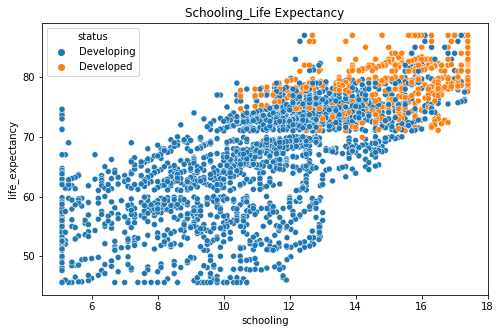

In [ ]:
# statusÎ•º Í∏∞Ï§ÄÏúºÎ°ú developed/developingÏúºÎ°ú ÎÇòÎàÑÏóàÏùÑ Îïå: schoolingÏóê Îî∞Î•∏ Í∏∞ÎåÄÏàòÎ™Ö Î≥ÄÌôî
stat_df = wins_df[['life_expectancy', 'year', 'status', 'schooling', 'hdi','gdp']]
plt.figure(figsize=(8, 5))
sch_le = sns.scatterplot(data = stat_df, y='life_expectancy', x='schooling', hue='status')
sch_le.set(title = "Schooling_Life Expectancy");

##### ‚úÖ ÍµêÏú°ÏàòÏ§ÄÏóê Îî∞Î•∏ Í∏∞ÎåÄ ÏàòÎ™ÖÏùò Ï∂îÏù¥Î•º ÌÜµÌï¥ ÍµêÏú°ÏàòÏ§ÄÏù¥ ÎÜíÏùÑÏàòÎ°ù Í∏∞ÎåÄ ÏàòÎ™ÖÏù¥ ÎäòÏñ¥ÎÇòÎäî Í≤ÉÏùÑ Î≥º Ïàò ÏûàÏùå
- ÎåÄÏ≤¥Î°ú ÏÑ†ÏßÑÍµ≠ÏùÄ Í∞úÎ∞úÎèÑÏÉÅÍµ≠Ïóê ÎπÑÌï¥ ÍµêÏú° ÏàòÏ§ÄÏù¥ ÎÜíÏùå

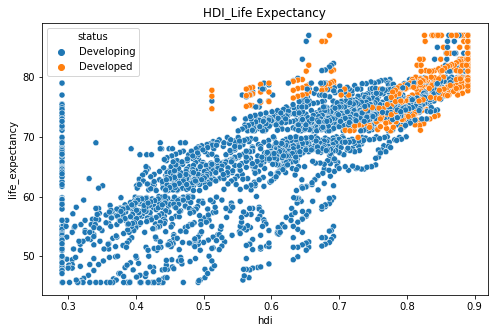

In [ ]:
# statusÎ•º Í∏∞Ï§ÄÏúºÎ°ú developed/developingÏúºÎ°ú ÎÇòÎàÑÏóàÏùÑ ÎïåÏùò: hdiÏóê Îî∞Î•∏ Í∏∞ÎåÄÏàòÎ™Ö
plt.figure(figsize=(8, 5))
hdi_le = sns.scatterplot(data = stat_df, y='life_expectancy', x='hdi', hue='status')
hdi_le.set(title = "HDI_Life Expectancy");

##### ‚úÖ ÎòêÌïú HDIÎèÑ ÎÜíÏùÑÏàòÎ°ù Í∏∞ÎåÄ ÏàòÎ™ÖÏù¥ Ïó∞Ïû•ÎêòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§. 
- ÎçîÎ∂àÏñ¥ ÏÑ†ÏßÑÍµ≠Ïùò HDI ÏßÄÏàòÍ∞Ä ÎåÄÏ≤¥Î°ú Í∞úÎ∞úÎèÑÏÉÅÍµ≠Î≥¥Îã§ ÎÜíÎã§Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

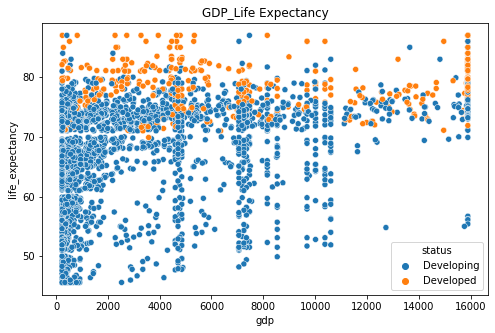

In [ ]:
# statusÎ•º Í∏∞Ï§ÄÏúºÎ°ú developed/developingÏúºÎ°ú ÎÇòÎàÑÏóàÏùÑ ÎïåÏùò: gdpÏóê Îî∞Î•∏ Í∏∞ÎåÄÏàòÎ™Ö
plt.figure(figsize=(8, 5))
hdi_le = sns.scatterplot(data = stat_df, y='life_expectancy', x='gdp', hue='status')
hdi_le.set(title = "GDP_Life Expectancy");

##### ‚úÖ Í∑∏ÎûòÌîÑÏóêÏÑú GDPÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Í∏∞ÎåÄÏàòÎ™ÖÏù¥ ÎÇÆÏùÄ ÏºÄÏù¥Ïä§Ïùò Î∂ÑÌè¨Í∞Ä Ï†êÏ∞® ÏÇ¨ÎùºÏßÄÍ∏∞ ÎïåÎ¨∏Ïóê GDPÍ∞Ä Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù Í∏∞ÎåÄ ÏàòÎ™ÖÏù¥ Ïó∞Ïû•ÎêòÎäî Í≤ΩÌñ•Ïù¥ ÏûàÎã§Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§. 
- ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏÑ†ÏßÑÍµ≠Ïùò GDPÍ∞Ä ÎåÄÏ≤¥Î°ú Í∞úÎ∞úÎèÑÏÉÅÍµ≠Î≥¥Îã§ ÎÜíÎã§.

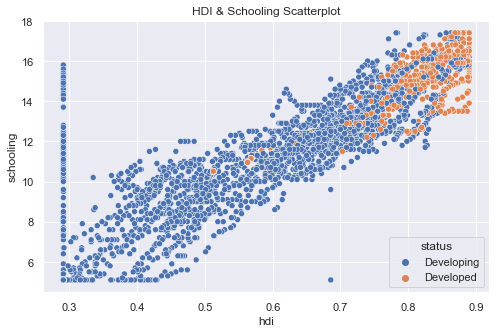

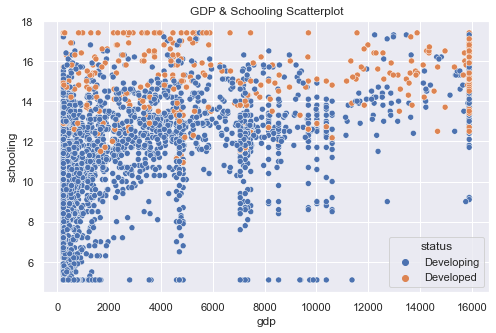

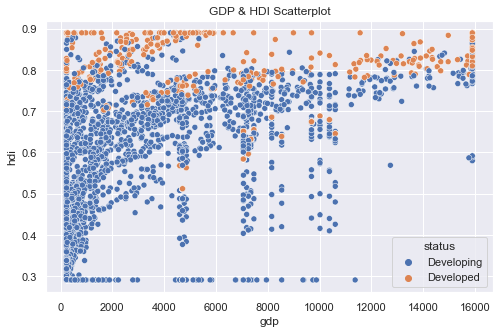

In [ ]:
# schoolingÍ≥º hdi, gdp Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ
plt.figure(figsize=(8, 5))
hdi_le = sns.scatterplot(data = stat_df, y='schooling', x='hdi', hue='status')
hdi_le.set(title = "HDI & Schooling Scatterplot")      # ÏÇ∞Ìè¨ÎèÑÎèÑ Îëò Í∞ÑÏùò ÎπÑÎ°Ä Í¥ÄÍ≥ÑÍ∞Ä ÏûàÏùåÏùÑ Î≥¥Ïó¨Ï§å

plt.figure(figsize=(8, 5))
hdi_le = sns.scatterplot(data = stat_df, y='schooling', x='gdp', hue='status')
hdi_le.set(title = "GDP & Schooling Scatterplot") 

plt.figure(figsize=(8, 5))
hdi_le = sns.scatterplot(data = stat_df, y='hdi', x='gdp', hue='status')
hdi_le.set(title = "GDP & HDI Scatterplot") ;

##### ‚úÖ Îî∞ÎùºÏÑú HDIÏôÄ ÍµêÏú°ÏàòÏ§Ä Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º scatterplotÏúºÎ°ú Í∑∏Î†§Î≥¥ÏïòÏùÑ Îïå, ÏÑúÎ°ú ÎπÑÎ°ÄÍ¥ÄÍ≥ÑÏóê ÏûàÏùåÏùÑ Ïïå Ïàò ÏûàÎã§. 
- ÎòêÌïú ÏÑ†ÏßÑÍµ≠ÏùÄ Í∞úÎ∞úÎèÑÏÉÅÍµ≠Ïóê ÎπÑÌï¥ ÍµêÏú°ÏàòÏ§ÄÍ≥º HDI Î™®Îëê Îçî ÎÜíÎã§Îäî Í≤ÉÏùÑ Îã§Ïãú Ìïú Î≤à ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

#### üî• Í≤∞Î°† : ÌÜµÍ≥ÑÏ†Å Í≤ÄÏ†ïÍ≥º Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ Íµ≠Í∞ÄÍ∞Ä ÏÑ†ÏßÑÌôîÎê†ÏàòÎ°ù Í∏∞ÎåÄ ÏàòÎ™ÖÏù¥ Ï¶ùÍ∞ÄÌï† Ïàò ÏûàÎã§Îäî Í∞ÄÏÑ§ 2Í∞Ä ÏÑ±Î¶ºÎê† Ïàò ÏûàÎã§.
-----

### Í∞ÄÏÑ§ 3Ïóê ÎåÄÌïú Í≤ÄÏ†ï

In [ ]:
# 3Î≤à Í∞ÄÏÑ§: Ï†ïÎ∂ÄÏôÄ Í∞úÏù∏Ïù¥ Í±¥Í∞ïÏùÑ ÏúÑÌï¥ ÏÜåÎπÑÌïòÎäî ÎπÑÏ§ëÏù¥ ÎÜíÏùÑÏàòÎ°ù Í∏∞ÎåÄ ÏàòÎ™ÖÏùÄ ÎäòÏñ¥ÎÇ† Í≤É
# percentage_expenditureÏôÄ Í∏∞ÎåÄ ÏàòÎ™Ö Í∞Ñ Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ï Ïã§Ïãú
chi_respex = chi2_contingency(pd.crosstab(wins_df['percentage_expenditure'], wins_df['life_expectancy']))
print('percentage_expenditure & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_respex[0], chi_respex[1]))

# total_expenditureÏôÄ Í∏∞ÎåÄ ÏàòÎ™Ö Í∞Ñ Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ï Ïã§Ïãú
chi_restex = chi2_contingency(pd.crosstab(wins_df['total_expenditure'], wins_df['life_expectancy']))
print('total_expenditure & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_restex[0], chi_restex[1]))

# percentage_expenditureÏôÄ total_expenditure Í∞Ñ Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ï Ïã§Ïãú
chi_resexs = chi2_contingency(pd.crosstab(wins_df['percentage_expenditure'], wins_df['total_expenditure']))
print('percentage_expenditure & total_expenditure_Chi2 Statistic: {}, p-value: {}'.format(chi_resexs[0], chi_resexs[1]))

# alcohol & life_expectancy Í∞Ñ chi-square test
## Í±¥Í∞ïÏùÑ ÏúÑÌï¥ ÏÜåÎπÑÌïòÎäî ÌñâÏúÑÍ∞Ä Ï†ÑÌòÄ ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÎòêÌïú Ïñ¥Îñ§ ÏòÅÌñ•ÏùÑ Ï£ºÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ Ïã§Ïãú
chi_resal = chi2_contingency(pd.crosstab(wins_df['alcohol'], wins_df['life_expectancy']))
print('alcohol & life_expectancy_Chi2 Statistic: {}, p-value: {}'.format(chi_resal[0], chi_resal[1]))

# alcohol & percentage_expenditure Í∞Ñ chi-square test
chi_resalexp = chi2_contingency(pd.crosstab(wins_df['alcohol'], wins_df['percentage_expenditure']))
print('alcohol & percentage_expenditure_Chi2 Statistic: {}, p-value: {}'.format(chi_resalexp[0], chi_resalexp[1]))

percentage_expenditure & life_expectancy_Chi2 Statistic: 681764.1003949224, p-value: 9.766660350236392e-116
total_expenditure & life_expectancy_Chi2 Statistic: 257024.45026718595, p-value: 0.7575309470505511
percentage_expenditure & total_expenditure_Chi2 Statistic: 1485089.7279672197, p-value: 7.381457227733676e-135
alcohol & life_expectancy_Chi2 Statistic: 346868.8930095977, p-value: 1.0
alcohol & percentage_expenditure_Chi2 Statistic: 2049505.6793536078, p-value: 1.2399960327569453e-70


##### ‚úÖ Í≤ÄÏ†ï Í≤∞Í≥ºÎ•º ÌÜµÌï¥ `GDP ÎåÄÎπÑ Í±¥Í∞ï Í¥ÄÎ†® ÏßÄÏ∂ú`Îßå Í∏∞ÎåÄ ÏàòÎ™ÖÍ≥º Ïó∞Í¥ÄÎêòÏñ¥ ÏûàÏùåÏùÑ ÌôïÏù∏
- ÏïåÏΩîÏò¨ ÏÜåÎπÑÎüâÍ≥º Ï†ïÎ∂Ä ÏßÄÏ∂ú ÎåÄÎπÑ Î≥¥Í±¥ Í¥ÄÎ†® ÏßÄÏ∂úÏùÄ Í∏∞ÎåÄ ÏàòÎ™ÖÍ≥º Ïó∞Í¥ÄÏóÜÎã§Í≥† Î≥º Ïàò ÏûàÎã§.

#### üî• Í≤∞Î°† : ÌÜµÍ≥ÑÏ†Å Í∞ÄÏÑ§ Í≤ÄÏ†ïÍ≥º Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ `GDP ÎåÄÎπÑ Í±¥Í∞ï Í¥ÄÎ†® ÏßÄÏ∂ú`Ïóê ÎåÄÌï¥ÏÑúÎßå Í∞ÄÏÑ§ 3Ïù¥ ÏÑ±Î¶ΩÌï®
- ÏïåÏΩîÏò¨ ÏÜåÎπÑÎüâÍ≥º Ï†ïÎ∂Ä ÏßÄÏ∂ú ÎåÄÎπÑ Î≥¥Í±¥ Í¥ÄÎ†® ÏßÄÏ∂úÏóê ÎåÄÌï¥ÏÑúÎäî Í∞ÄÏÑ§ 3Ïù¥ ÏÑ±Î¶ΩÎêòÏßÄ ÏïäÍ≥† ÏûàÎã§.
----------

## Í∏∞ÎåÄÏàòÎ™Ö ÏòàÏ∏° Î™®Îç∏ÎßÅ

### 5-1. Feature Engineering Î∞è Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
    1. 5ÏÑ∏ ÎØ∏Îßå ÏïÑÎèô ÏÇ¨ÎßùÎ•† Ï§ë hiv/aidsÎ°ú ÏÇ¨ÎßùÌï† ÌôïÎ•†Ïóê ÎåÄÌïú feature Ï∂îÍ∞ÄÌïòÍ∏∞
    2. Í∏∞ÎåÄÏàòÎ™ÖÍ≥º Ïπ¥Ïù¥Ï†úÍ≥±Í≤ÄÏ†ïÏùÑ ÌñàÏùÑ Îïå p-value=1Ïù∏, Ï¶â Í∏∞ÎåÄÏàòÎ™ÖÍ≥º Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÎäî ÏÑ∏ Í∞ÄÏßÄ Î≥ÄÏàòÏù∏ gdp, population, alcohol Ï†úÍ±∞ÌïòÍ∏∞
    3. categorical Î≥ÄÏàò Ï≤òÎ¶¨ÌïòÍ∏∞

In [20]:
# 1. 5ÏÑ∏ ÎØ∏Îßå ÏïÑÎèô ÏÇ¨ÎßùÎ•† Ï§ë hiv/aidsÎ°ú ÏÇ¨ÎßùÌï† ÌôïÎ•†Ïóê ÎåÄÌïú feature Ï∂îÍ∞Ä

# Ìï¥Îãπ Ìï®Ïàò ÏÉùÏÑ± 
def percent_hivaids(df):
    df['percent_hiv'] = df['hiv'] / (df['under_five_mortality']*1000)
    return df

wins_df2 = percent_hivaids(wins_df)     # hiv/aidsÎ°ú ÏÇ¨ÎßùÌï† ÌôïÎ•†Ïóê ÎåÄÌïú feature Ï∂îÍ∞Ä
wins_df2.head(3)

country  year      status   bmi  life_expectancy  adult_mortality  \
0   Afghanistan  2015  Developing  19.1             65.0            0.263   
16      Albania  2015  Developing  58.0             77.8            0.074   
32      Algeria  2015  Developing  59.5             75.6            0.019   

    infant_mortality   alcohol  percentage_expenditure  hepatitis_b  ...  \
0              0.055  0.010000               71.279624         65.0  ...   
16             0.000  4.600000              364.975229         99.0  ...   
32             0.021  5.288333                0.000000         95.0  ...   

    total_expenditure  diphtheria  hiv         gdp  population  thin_1019  \
0                8.16        65.0  0.1   584.25921  28656282.0       14.6   
16               6.00        99.0  0.1  3954.22783     28873.0        1.2   
32               7.08        95.0  0.1  4132.76292  28656282.0        6.0   

    thin_59    hdi  schooling  percent_hiv  
0      15.0  0.479       10.1     0.001515  
16      1.3  0.762       14.2          NaN  
32      5.8  0.743       14.4     0.004167  

[3 rows x 23 columns]

In [21]:
# Í≤∞Ï∏°Ïπò ÌôïÏù∏
print('percent_hiv Í≤∞Ï∏°Ïπò Ïàò: ', wins_df2['percent_hiv'].isna().sum())
print('-'*20)

# Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ÌïòÍ∏∞ ÏúÑÌï¥ Î∂ÑÏûê/Î∂ÑÎ™®Ïù∏ Î≥ÄÏàòÏóê value==0Ïù∏ Í≤ΩÏö∞ ÏûàÎäîÏßÄ ÌôïÏù∏
print('hiv \n', wins_df2['hiv'].value_counts())
print('-'*20)
print('\nunder_five_mortality: \n', wins_df2['under_five_mortality'].value_counts())

percent_hiv Í≤∞Ï∏°Ïπò Ïàò:  785
--------------------
hiv 
 0.1    1781
1.7     563
0.2     124
0.3     115
0.4      69
0.5      42
0.6      35
0.8      32
0.9      32
0.7      29
1.6      21
1.5      21
1.2      18
1.1      15
1.4      15
1.3      14
1.0      12
Name: hiv, dtype: int64
--------------------

under_five_mortality: 
 0.000    785
0.066    412
0.001    361
0.002    163
0.004    161
        ... 
0.051      4
0.060      4
0.059      3
0.057      2
0.053      2
Name: under_five_mortality, Length: 67, dtype: int64


- percent_hiv/aidsÏùò Í≤∞Ï∏°ÏπòÎäî under-five_mortalityÏùò value==0Ïù¥Ïñ¥ÏÑú ÏÉùÍ≤®ÎÇòÎØÄÎ°ú Í≤∞Ï∏°ÏπòÎ•º 0ÏúºÎ°ú Ï≤òÎ¶¨ÌïúÎã§.

In [22]:
# Í≤∞Ï∏°Ïπò 0ÏúºÎ°ú Ï≤òÎ¶¨ÌïòÍ∏∞
wins_df2['percent_hiv'].fillna(0, inplace=True)
print('percent_hiv Í≤∞Ï∏°Ïπò Ïàò: ', wins_df2['percent_hiv'].isna().sum())

percent_hiv Í≤∞Ï∏°Ïπò Ïàò:  0


In [23]:
# 2. Í∏∞ÎåÄÏàòÎ™ÖÍ≥º Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÎäî population Ï†úÍ±∞
wins_df2.drop(columns =['population'], axis=1, inplace=True)
wins_df2.head(3)

country  year      status   bmi  life_expectancy  adult_mortality  \
0   Afghanistan  2015  Developing  19.1             65.0            0.263   
16      Albania  2015  Developing  58.0             77.8            0.074   
32      Algeria  2015  Developing  59.5             75.6            0.019   

    infant_mortality   alcohol  percentage_expenditure  hepatitis_b  ...  \
0              0.055  0.010000               71.279624         65.0  ...   
16             0.000  4.600000              364.975229         99.0  ...   
32             0.021  5.288333                0.000000         95.0  ...   

    polio  total_expenditure  diphtheria  hiv         gdp  thin_1019  thin_59  \
0    52.0               8.16        65.0  0.1   584.25921       14.6     15.0   
16   99.0               6.00        99.0  0.1  3954.22783        1.2      1.3   
32   95.0               7.08        95.0  0.1  4132.76292        6.0      5.8   

      hdi  schooling  percent_hiv  
0   0.479       10.1     0.001515  
16  0.762       14.2     0.000000  
32  0.743       14.4     0.004167  

[3 rows x 22 columns]

In [24]:
# 3. categorical Î≥ÄÏàò(country, status) Ï≤òÎ¶¨ÌïòÍ∏∞
## countryÎäî Ï†úÍ±∞
wins_df2.drop(columns =['country'], axis=1, inplace=True)

## statusÎäî ÎçîÎØ∏ÌôîÌï¥ ÏàòÏπòÌôîÌï®
wins_df2 = pd.concat([wins_df2, pd.get_dummies(wins_df2['status'],drop_first=True)],axis=1)
wins_df2.drop(columns =['status'], axis=1, inplace=True)    ## Í∏∞Ï°¥Ïùò statusÎäî Ï†úÍ±∞ÌïòÍ∏∞

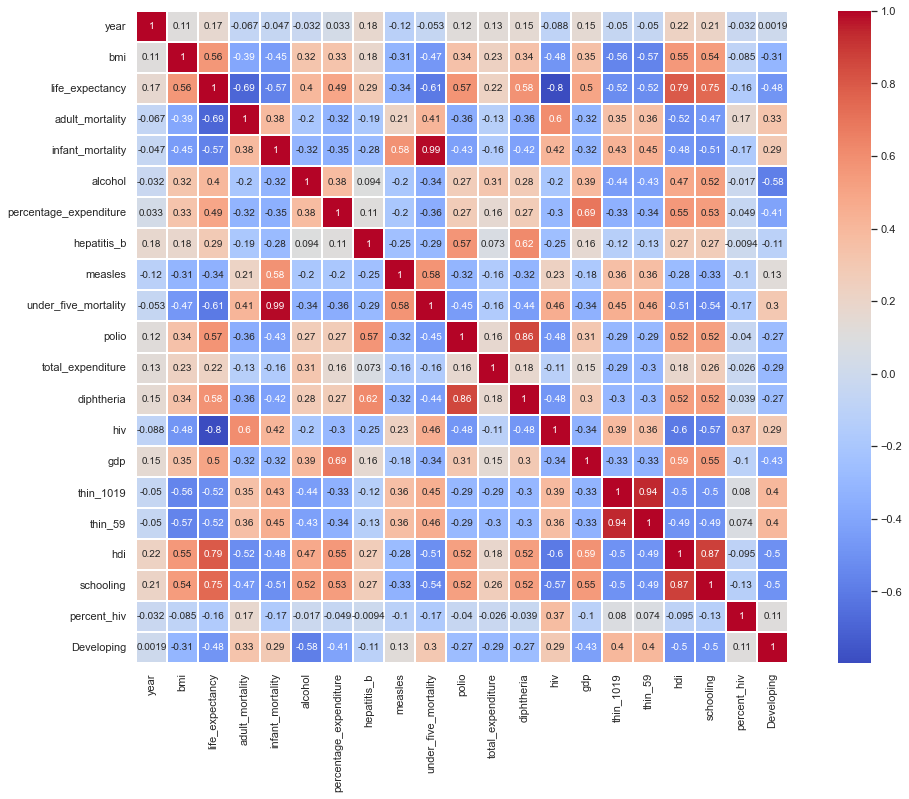

In [27]:
# winds_df2Ïóê ÎåÄÌïú heat map: Ïó∞ÏÜçÌòï Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ ÌååÏïÖ
sns.set(rc = {'figure.figsize':(18,12)})
sns.heatmap(wins_df2[wins_df2.columns].astype(float).corr(), linewidths = 0.1, vmax = 1.0, cmap='coolwarm', square = True, linecolor = "white", annot = True, annot_kws = {"size" : 10});

- heatmapÏóêÏÑú Ïú†ÏïÑ ÏÇ¨ÎßùÎ•†&5ÏÑ∏ ÎØ∏Îßå ÏïÑÎèô ÏÇ¨ÎßùÎ•†, schooling&hdi, thin_10-19&thin_5-9 Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÍ∞Ä ÎÜíÎã§Îäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

- Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎì§ Ï§ëÏóêÏÑú Í∏∞ÎåÄÏàòÎ™ÖÍ≥ºÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä Îçî ÎÜíÏùÄ Í≤ÉÎßå ÎÇ®Í≤®ÎëêÍ∏∞Î°ú ÌïúÎã§.

In [25]:
# Ïª¨Îüº Ï†ïÎ¶¨ÌïòÍ∏∞
wins_df2.drop(columns =['infant_mortality', 'schooling', 'thin_59'], axis=1, inplace=True)
wins_df2.head(3)

year   bmi  life_expectancy  adult_mortality   alcohol  \
0   2015  19.1             65.0            0.263  0.010000   
16  2015  58.0             77.8            0.074  4.600000   
32  2015  59.5             75.6            0.019  5.288333   

    percentage_expenditure  hepatitis_b  measles  under_five_mortality  polio  \
0                71.279624         65.0    0.741                 0.066   52.0   
16              364.975229         99.0    0.000                 0.000   99.0   
32                0.000000         95.0    0.063                 0.024   95.0   

    total_expenditure  diphtheria  hiv         gdp  thin_1019    hdi  \
0                8.16        65.0  0.1   584.25921       14.6  0.479   
16               6.00        99.0  0.1  3954.22783        1.2  0.762   
32               7.08        95.0  0.1  4132.76292        6.0  0.743   

    percent_hiv  Developing  
0      0.001515           1  
16     0.000000           1  
32     0.004167           1

### 5-2. Î™®Îç∏ ÌïôÏäµ
ÏïÑÎûò Ï¥ù 4Í∞ÄÏßÄ Î®∏Ïã†Îü¨Îãù Î™®Îç∏Î°ú Í∏∞ÎåÄÏàòÎ™ÖÏùÑ ÏòàÏ∏°Ìï¥Î≥º Í≤ÉÏù¥Îã§.

1. Linear Regression
2. Ridge Regression
3. Randomforest Regressor
4. XGBRegressor

In [26]:
# ÎèÖÎ¶Ω/Ï¢ÖÏÜç Î≥ÄÏàò ÏÑ§Ï†ï
target = 'life_expectancy'
feature = wins_df2.drop(columns=[target]).columns

# test/train/valÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨Î∂ÑÌïòÍ∏∞
train = wins_df2[wins_df2['year'] != 2015]
val = train[train['year'] == 2014]
test = wins_df2[wins_df2['year'] == 2015]
train.shape, val.shape, test.shape

((2755, 18), (183, 18), (183, 18))

In [27]:
# ÌõàÎ†®ÏÑ∏Ìä∏-ÎèÖÎ¶Ω/Ï¢ÖÏÜçÎ≥ÄÏàò ÏßÄÏ†ï + ÌÖåÏä§Ìä∏ÏÑ∏Ìä∏-ÎèÖÎ¶Ω/Ï¢ÖÏÜçÎ≥ÄÏàò ÏßÄÏ†ï
X_train = train[feature]
y_train = train[target]
X_test = test[feature]
y_test = test[target]
X_val = val[feature]
y_val = val[target]

In [29]:
# baseline: target(Í∏∞ÎåÄ ÏàòÎ™Ö)Ïùò ÌèâÍ∑† Í∞í
y = wins_df2[target]
baseline = [y.mean()] *len(y)

# baselineÏùò r2, mae
print('R2 score:', r2_score(y, baseline))
print('MAE: ', mean_absolute_error(y, baseline))
print('MSE: ', mean_squared_error(y, baseline))
print('RMSE: ', mean_squared_error(y, baseline)**0.5)

R2 score: 0.0
MAE:  7.741863297777127
MSE:  89.0963630582181
RMSE:  9.439086982236052


In [30]:
# 1. linear regression
model = LinearRegression()
model.fit(X_train, y_train)

## linear regression ÌèâÍ∞ÄÏßÄÌëú
y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_val, y_pred)

print('Linear Regression validation', 'MAE: {}'.format(mae), 'MSE: {}'.format(mse), 'RMSE: {}'.format(rmse), 'r2 score: {}'.format(r2))
print('Linear Regression validation_r2 score: ', model.score(X_val, y_val)) 

Linear Regression validation MAE: 2.39388772339964 MSE: 10.26648180124221 RMSE: 3.204135109704678 r2 score: 0.8559515731374612
Linear Regression validation_r2 score:  0.8559515731374612


In [31]:
# 2. Ridge Regression 
alpha = np.arange(0.1, 50, 0.1)
model_ridge = RidgeCV(alphas=alpha, cv=3)  
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_val)

print("alpha: ", model_ridge.alpha_)
print("best score: ", model_ridge.best_score_)

# ÌèâÍ∞ÄÏßÄÌëú Ï∂úÎ†•
mae_r = mean_absolute_error(y_val, y_pred_ridge)
mse_r = mean_squared_error(y_val, y_pred_ridge)
rmse_r = mse_r ** 0.5
r2_r = r2_score(y_test, y_pred_ridge)
print('Ridge Regression validation', 'MAE: {}'.format(mae_r), 'MSE: {}'.format(mse_r), 'RMSE: {}'.format(rmse_r), 'r2_score: {}'.format(r2_r))
print('Ridge Regression validation_r2 score: ', model.score(X_val, y_val)) 

alpha:  0.1
best score:  0.8460222195151464
Ridge Regression validation MAE: 2.3856278304360305 MSE: 10.242250542316624 RMSE: 3.20035162791788 r2_score: 0.8648268328849542
Ridge Regression validation_r2 score:  0.8559515731374612


- **Ïù¥ÎØ∏ RidgeÏóêÏÑú alpha=0Ïùº Îïå bestÏù¥Í∏∞ ÎïåÎ¨∏Ïóê Lasso Regression Î™®Îç∏Î°ú ÌïôÏäµÏùÑ ÏßÑÌñâÌïòÏßÄ ÏïäÏùÑ Í≤É!**

In [32]:
# Random Forest Î™®Îç∏ Íµ¨Ï∂ï
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_val)

# ÌèâÍ∞ÄÏßÄÌëú Ï∂úÎ†•
mae_rf = mean_absolute_error(y_val, y_pred_rf)
mse_rf = mean_squared_error(y_val, y_pred_rf)
rmse_rf = mse_rf ** 0.5
print('Random Forest Regressor validation', 'MAE: {}'.format(mae_rf), 'MSE: {}'.format(mse_rf), 'RMSE: {}'.format(rmse_rf))

print('Random Forest Regressor validation_r2 score: ', model_rf.score(X_val, y_val)) 

Random Forest Regressor validation MAE: 0.4664479082683867 MSE: 0.5277087785585574 RMSE: 0.7264356671850284
Random Forest Regressor validation_r2 score:  0.9925957479042417


In [37]:
# XGBRegressor Î™®Îç∏ ÌïôÏäµ
model_xgb = xgb.XGBRegressor()      # ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ§Î™Ö Î†àÌçºÎü∞Ïä§: http://okminseok.blogspot.com/2017/09/ml-xgboost.html
model_xgb.fit(X_train,y_train)
y_pred_xgb = model_xgb.predict(X_val)

# train/validation ÌèâÍ∞ÄÏßÄÌëú
print('XGBRegressor train score: ', model_xgb.score(X_train, y_train))

mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5
print('XGBRegressor validation', 'MAE: {}'.format(mae_xgb), 'MSE: {}'.format(mse_xgb), 'RMSE: {}'.format(rmse_xgb))

print('XGBRegressor validation_r2 score: ', model_xgb.score(X_val, y_val)) 

XGBRegressor train score:  0.9989341956362303
XGBRegressor validation MAE: 0.16723350566593012 MSE: 0.05642250608947678 RMSE: 0.23753422088085913
XGBRegressor validation_r2 score:  0.9992083390007229


#### üëáüèº XGBRegressorÏùò ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Îõ∞Ïñ¥ÎÇ¨ÏúºÎØÄÎ°ú Ïù¥ Î™®Îç∏Ïóê ÎåÄÌï¥ test Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏÑ±Îä•ÏùÑ ÎèÑÏ∂úÌïòÏó¨ ÏïÑÎûòÏôÄ Í∞ôÏù¥ ÎÇòÌÉÄÎÉÑ

In [38]:
# test Îç∞Ïù¥ÌÑ∞ ÏÑ±Îä• ÎèÑÏ∂ú: XGB
y_pred_test = model_xgb.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mse_test ** 0.5
print('XGBRegressor', 'Test MAE: {}'.format(mae_test), 'Test MSE: {}'.format(mse_test), 'Test RMSE: {}'.format(rmse_test))

print('XGBRegressor Test_r2 score: ', model_xgb.score(X_test, y_test)) 


XGBRegressor Test MAE: 1.5988149048852143 Test MSE: 4.078265291042675 Test RMSE: 2.0194715375668646
XGBRegressor Test_r2 score:  0.9376987037089975
